## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

In [ ]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.2.2 sklearn-pandas==2.2.0 -q --user

**Note**:

1. After running the above cell, kindly restart the notebook kernel (for Jupyter Notebook) or runtime (for Google Colab), write the relevant code for the project from the next cell, and run all cells sequentially from the next cell.

2. On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in this notebook.

In [ ]:
# Library to supress warnings
import warnings
warnings.filterwarnings('ignore')

# Libraries for reading and manipulating data
import numpy as np
import pandas as pd

# Libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries to split the data into training and testing sets
from sklearn.model_selection import train_test_split

# Libraries to build a decision tree classifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

# Libraries for classification metric scores
# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    confusion_matrix,
    classification_report,
    precision_score,
    recall_score,
    roc_auc_score,
    roc_curve,
    precision_recall_curve,
    auc,
    average_precision_score,
    make_scorer)

## Loading the dataset

In [ ]:
# Used Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Loads data into a pandas dataframe
loan_data = pd.read_csv('/content/drive/MyDrive/Loan_Modelling.csv')

In [ ]:
# Creates a copy of the data
data = loan_data.copy()

## Data Overview

* Observations
* Sanity checks

## Viewing the first and last 5 rows of the dataset

In [ ]:
# Shows the first five rows of the data
data.head(5)

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49    91107       4    1.6          1         0   
1   2   45          19      34    90089       3    1.5          1         0   
2   3   39          15      11    94720       1    1.0          1         0   
3   4   35           9     100    94112       1    2.7          2         0   
4   5   35           8      45    91330       4    1.0          2         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

In [ ]:
# Shows the last five rows of the data
data.tail(5)

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  \
4995  4996   29           3      40    92697       1    1.9          3   
4996  4997   30           4      15    92037       4    0.4          1   
4997  4998   63          39      24    93023       2    0.3          3   
4998  4999   65          40      49    90034       3    0.5          2   
4999  5000   28           4      83    92612       3    0.8          1   

      Mortgage  Personal_Loan  Securities_Account  CD_Account  Online  \
4995         0              0                   0           0       1   
4996        85              0                   0           0       1   
4997         0              0                   0           0       0   
4998         0              0                   0           0       1   
4999         0              0                   0           0       1   

      CreditCard  
4995           0  
4996           0  
4997           0  
4998           0  
4999           1

## Checking the shape of the dataset

In [ ]:
# Checks the shape of the dataset
data.shape

(5000, 14)

* The dataset has 5000 rows and 14 columns

## Checking the attribute types

In [ ]:
## Checking the attribute types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


* There are 8 numerical and 6 categorical variables in the data.
* Education, Personal_Loan, Securities_account, CD_Account, Online and CreditCard, although interpreted here as numerical, are categorical variables that are encoded by default.
* There is no object datatype.

### Checking the statistical summary

In [ ]:
# Shows the statistical summary of the dataset
data.describe(include='all')

ID          Age   Experience       Income       ZIPCode  \
count  5000.000000  5000.000000  5000.000000  5000.000000   5000.000000   
mean   2500.500000    45.338400    20.104600    73.774200  93169.257000   
std    1443.520003    11.463166    11.467954    46.033729   1759.455086   
min       1.000000    23.000000    -3.000000     8.000000  90005.000000   
25%    1250.750000    35.000000    10.000000    39.000000  91911.000000   
50%    2500.500000    45.000000    20.000000    64.000000  93437.000000   
75%    3750.250000    55.000000    30.000000    98.000000  94608.000000   
max    5000.000000    67.000000    43.000000   224.000000  96651.000000   

            Family        CCAvg    Education     Mortgage  Personal_Loan  \
count  5000.000000  5000.000000  5000.000000  5000.000000    5000.000000   
mean      2.396400     1.937938     1.881000    56.498800       0.096000   
std       1.147663     1.747659     0.839869   101.713802       0.294621   
min       1.000000     0.000000     1.000000     0.000000       0.000000   
25%       1.000000     0.700000     1.000000     0.000000       0.000000   
50%       2.000000     1.500000     2.000000     0.000000       0.000000   
75%       3.000000     2.500000     3.000000   101.000000       0.000000   
max       4.000000    10.000000     3.000000   635.000000       1.000000   

       Securities_Account  CD_Account       Online   CreditCard  
count         5000.000000  5000.00000  5000.000000  5000.000000  
mean             0.104400     0.06040     0.596800     0.294000  
std              0.305809     0.23825     0.490589     0.455637  
min              0.000000     0.00000     0.000000     0.000000  
25%              0.000000     0.00000     0.000000     0.000000  
50%              0.000000     0.00000     1.000000     0.000000  
75%              0.000000     0.00000     1.000000     1.000000  
max              1.000000     1.00000     1.000000     1.000000

* The average customer is 45 years old with 20 years of experience.
* The minimum age of a customer is 23 years old.
* The average house mortgage is around $56,000.
* Experience has negative values. In our case, Experience should not have negative value.

### Checking for missing values

In [ ]:
# Checking for null values
data.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

* There are no missing values in the dataset.

### Checking for duplicate values

In [ ]:
# Checks the data for duplicate values
data.duplicated().sum()

0

* There are no duplicate values in the dataset

###Checking for unique data

In [ ]:
# Shows the number of unique values for each column
data.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIPCode                467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal_Loan            2
Securities_Account       2
CD_Account               2
Online                   2
CreditCard               2
dtype: int64

###Fit the Experience variable

In [ ]:
# Uses the lambda function to replace negative values in the Experience varibale
data['Experience'] = data['Experience'].apply(lambda x: x if x >= 0 else 0)

In [ ]:
# Checks to see if there are negative values in the Experience variable
data[data['Experience'] < 0]

Empty DataFrame
Columns: [ID, Age, Experience, Income, ZIPCode, Family, CCAvg, Education, Mortgage, Personal_Loan, Securities_Account, CD_Account, Online, CreditCard]
Index: []

## Exploratory Data Analysis.

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
2. How many customers have credit cards?
3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
4. How does a customer's interest in purchasing a loan vary with their age?
5. How does a customer's interest in purchasing a loan vary with their education?

In [ ]:
# Creates combined histogram and boxplot for univariate analysis
def plot_histogram_and_box(data_frame, column_name, figsize=(10, 6), show_density=True, bins_count=None):
    """
    Create a combined boxplot and histogram for a numerical feature in the dataset.

    Args:
    data_frame (DataFrame): The dataset containing the feature.
    column_name (str): The name of the numerical column to plot.
    figsize (tuple): Dimensions of the figure (default is (10, 6)).
    show_density (bool): Flag to include a density curve (default is True).
    bins_count (int or None): Number of bins for the histogram (default is None).

    Returns:
    None
    """

    # Initialize subplots
    figure, (ax_box, ax_hist) = plt.subplots(
        nrows=2, sharex=True, figsize=figsize,
        gridspec_kw={"height_ratios": [0.25, 0.75]}
    )

    # Draw the boxplot
    sns.boxplot(data=data_frame, x=column_name, ax=ax_box, showmeans=True, color='lightcoral')

    # Draw the histogram with optional density estimation
    sns.histplot(data=data_frame, x=column_name, ax=ax_hist, bins=bins_count or 'auto', kde=show_density, color='skyblue')

    # Add mean and median lines to the histogram
    for stat, line_color, line_style in zip(
        [data_frame[column_name].mean(), data_frame[column_name].median()],
        ['limegreen', 'darkslategray'],
        ['--', '-']
    ):
        ax_hist.axvline(stat, color=line_color, linestyle=line_style)

    # Set titles and labels
    ax_hist.set_title(f'Distribution Overview of {column_name}', fontsize=14)
    ax_hist.set_ylabel('Count', fontsize=12)

    plt.tight_layout()  # Adjust layout for better spacing
    plt.show()

####Observation of Age of Customers

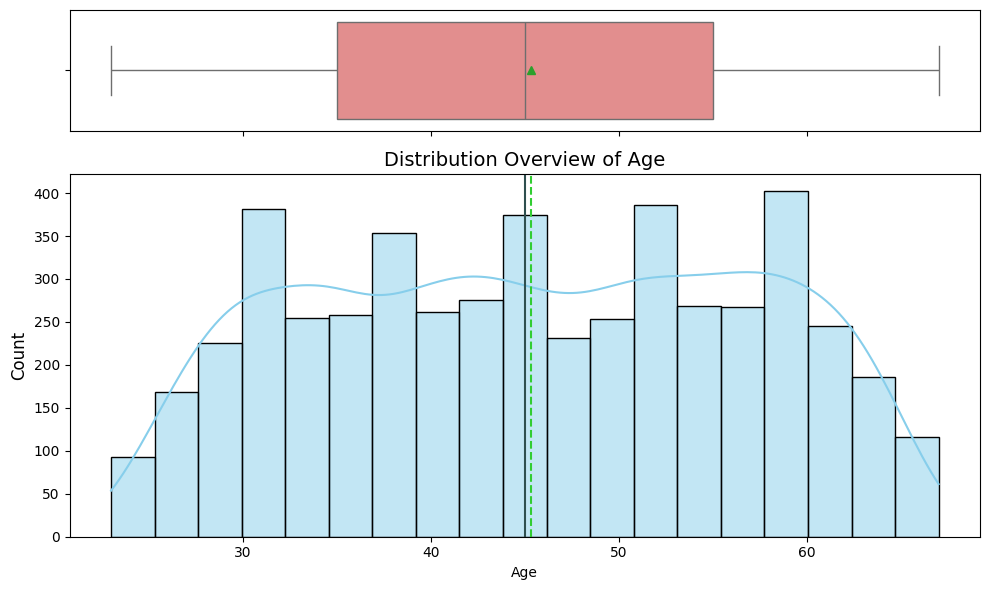

In [ ]:
# Shows the histogram and boxplot for the age of customers
plot_histogram_and_box(data, 'Age')

* The median age of customer is 45 years old.
* The average age of customer approximately 46 years old.

####Observation on Experience of Customers

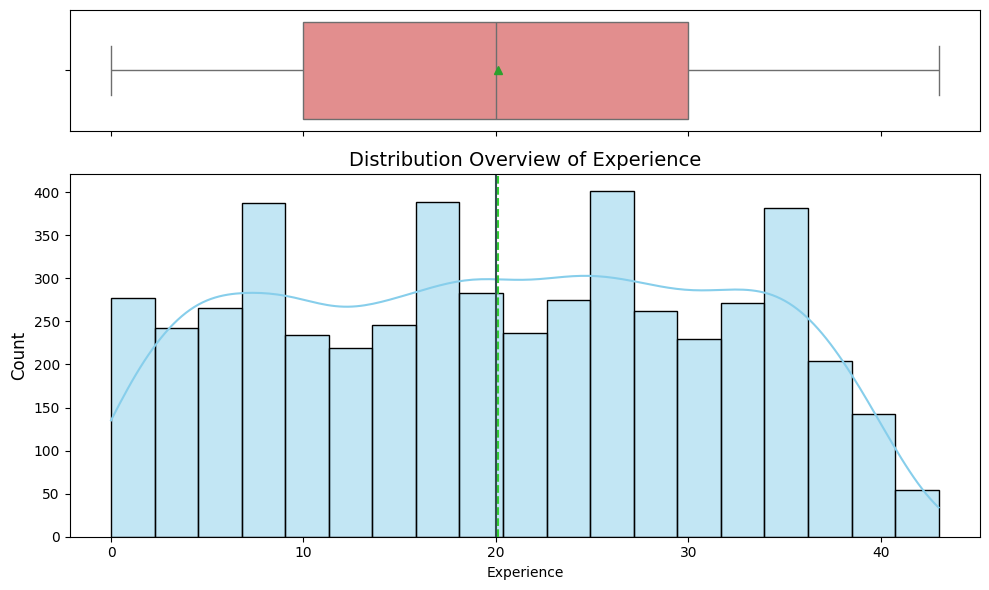

In [ ]:
# Shows the histogram and boxplot for the experience of customers
plot_histogram_and_box(data, 'Experience')

* The average customer has 20 years of experience.

####Observation on Income of Customers

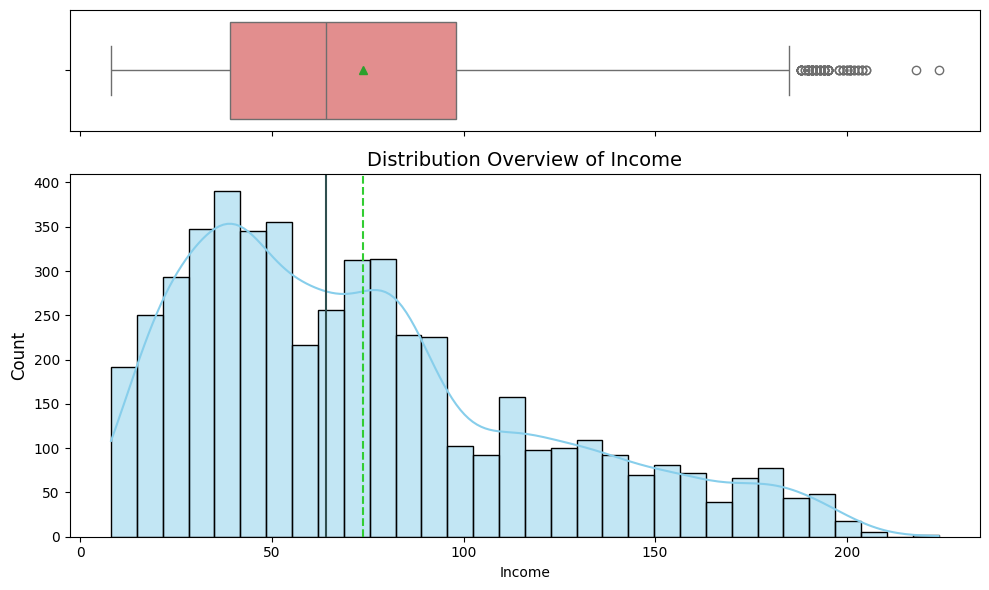

In [ ]:
# Shows the histogram and boxplot of the income of customers
plot_histogram_and_box(data, 'Income')

* The boxplot for income has outliers on the right.
* The histogram has a right-skewed distribution.

####Observation on Family Size of Customers

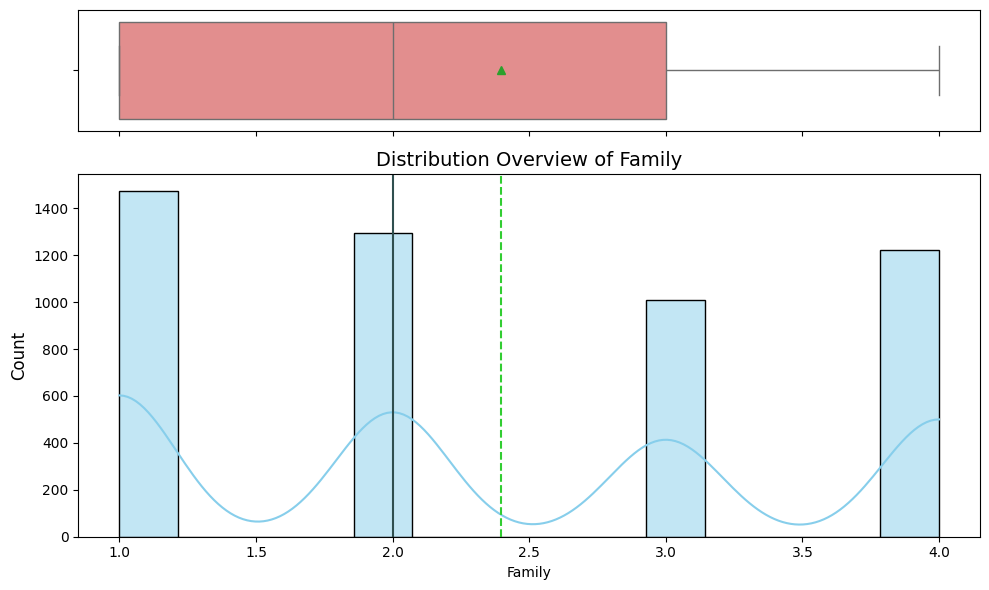

In [ ]:
plot_histogram_and_box(data, 'Family')

* The boxplot has a right skewed distribution.
* This variable has no outliers.

####Observation on CCAvg of Customers

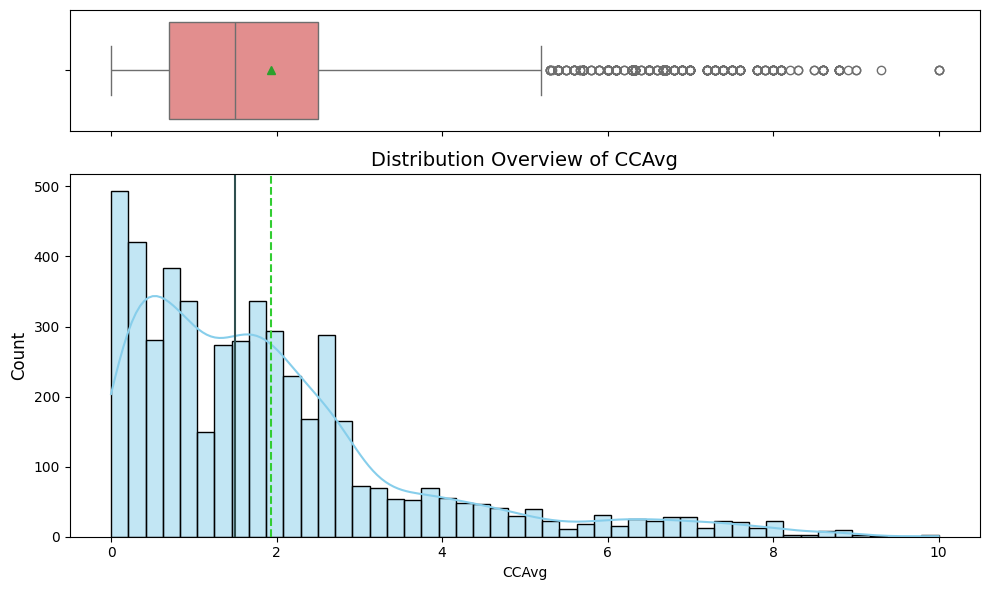

In [ ]:
plot_histogram_and_box(data, 'CCAvg')

* The data has a right-skewed distribution.
* All outliers are on the right side of the boxplot.

###Observation on Education of Customers

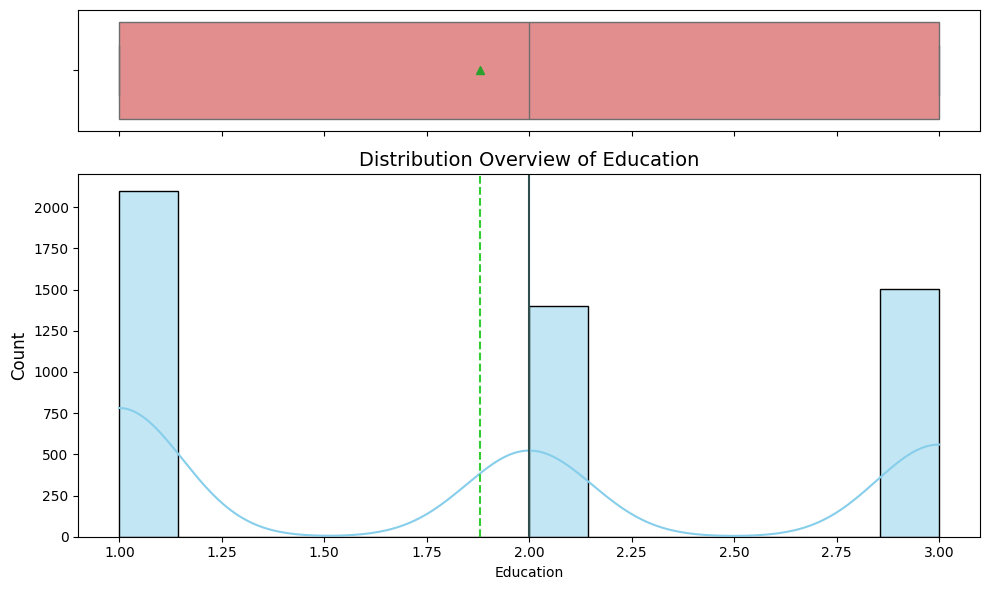

In [ ]:
plot_histogram_and_box(data, 'Education')

* This variable has no outliers.
* The data is unskewed.

###Observations on Mortgage of Customers

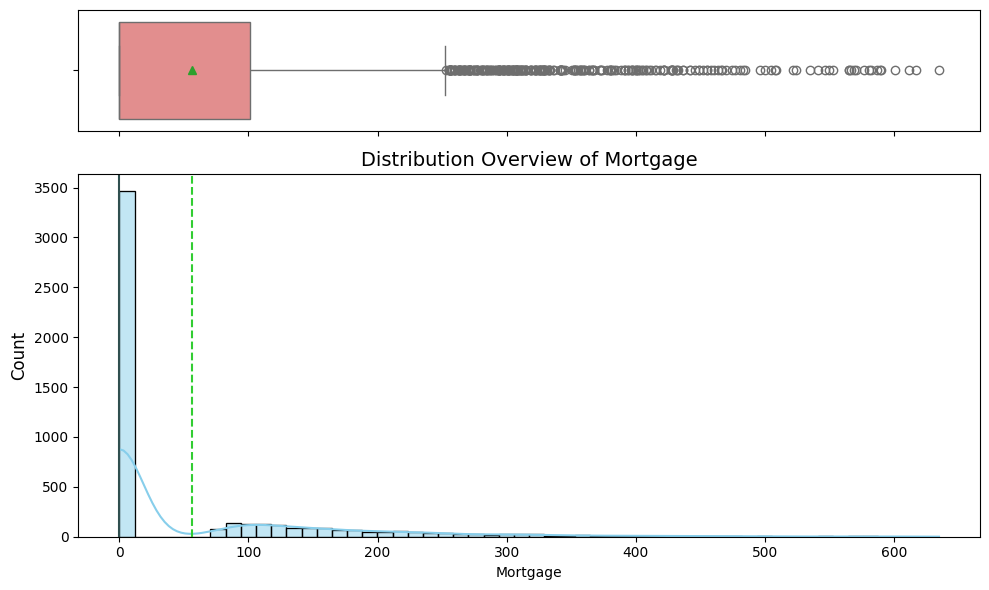

In [ ]:
plot_histogram_and_box(data, 'Mortgage')

* The boxplot shows that there are outliers on the right side of the data.
* The data has a right-skewed distribution.

###Univariate Analysis of Categorical Variables

In [ ]:
# Prints out the numerical and categorical variables
cat_column = [column for column in data.columns if data[column].nunique() <= 5]
print(cat_column)
num_column = [column for column in data.columns if data[column].nunique() > 5]
print(num_column)

['Family', 'Education', 'Personal_Loan', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard']
['ID', 'Age', 'Experience', 'Income', 'ZIPCode', 'CCAvg', 'Mortgage']


In [ ]:
# Function to create labeled barplots for categorical variables in the dataset
def custom_barplot(df, column_name, show_percentage=False, top_n=None):
    """
    Create a barplot with annotations displaying counts or percentages.

    Parameters:
    df: pandas DataFrame
    column_name: str, column in the DataFrame to plot
    show_percentage: bool, if True, display percentage instead of counts
    top_n: int, number of top categories to display (if None, display all)
    """
    # Calculate total entries for percentage calculations
    total_entries = len(df[column_name])
    unique_count = df[column_name].nunique()

    # Set the figure size based on unique categories or top_n
    plt.figure(figsize=(top_n + 2 if top_n else unique_count + 2, 6))

    # Configure x-axis labels
    plt.xticks(rotation=90, fontsize=12)

    # Generate the count plot
    ax = sns.countplot(
        data=df,
        x=column_name,
        palette="Set2",
        order=df[column_name].value_counts().index[:top_n]
    )

    # Annotate bars with counts or percentages
    for bar in ax.patches:
        value = bar.get_height()
        label = f"{value:.1f}%" if show_percentage else value

        # Calculate the position for the label
        x_pos = bar.get_x() + bar.get_width() / 2
        y_pos = bar.get_height()

        # Add annotation above the bars
        ax.annotate(
            label,
            (x_pos, y_pos),
            ha="center",
            va="bottom",
            fontsize=10,
            xytext=(0, 5),
            textcoords="offset points"
        )

    # Set plot title and labels
    plt.title(f"Distribution of {column_name}", fontsize=16)
    plt.ylabel("Count" if not show_percentage else "Percentage", fontsize=14)
    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()


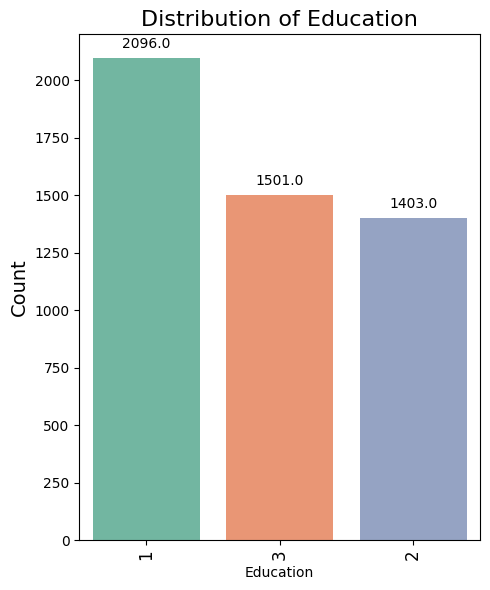

In [ ]:
# Shows a labaled barplot for Education variable
custom_barplot(data, 'Education')

* 2096 customers have completed an undergraduate degree.
* 1501 customers have completed an advanced/professional degree,
* 1493 customers have completed a graduate degree.

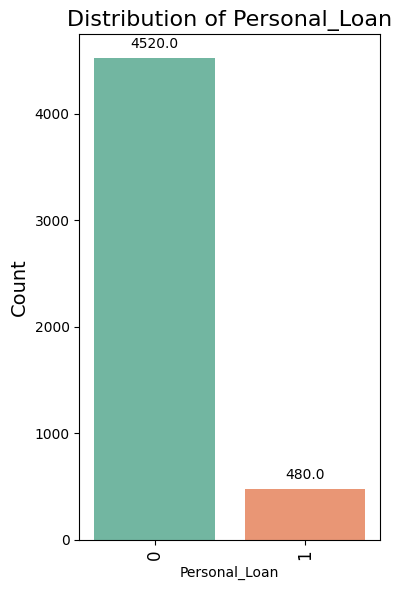

In [ ]:
# Shows a labeled barplot for Personal Loan variable
custom_barplot(data, 'Personal_Loan')

* 4520 customers did not accept the personal loan offered to them by the bank.

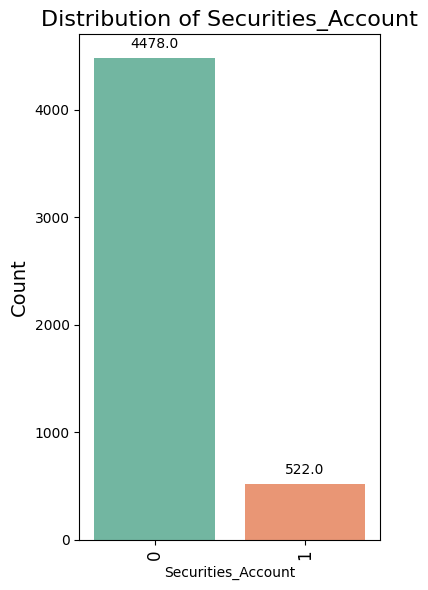

In [ ]:
# Shows a labeled barplot of Securities Account variable
custom_barplot(data, 'Securities_Account')

* 4698 customers do not have a CD (Certificate of Deposit) account.

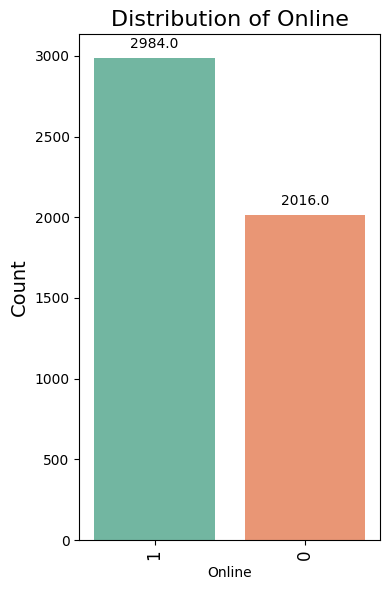

In [ ]:
# Shows a labeled barplot of Online variable
custom_barplot(data, 'Online')

* 2984 customers use online facilities provided by the bank.

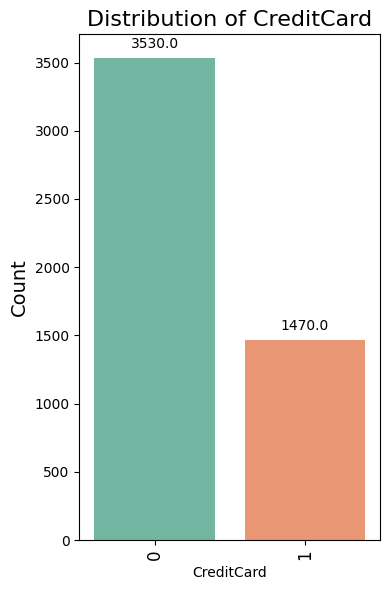

In [ ]:
# Shows a labeled barplot for CreditCard variable
custom_barplot(data, 'CreditCard')

* 3530 customers do not have a credit card issued by a bank

### **Bivariate Analysis**

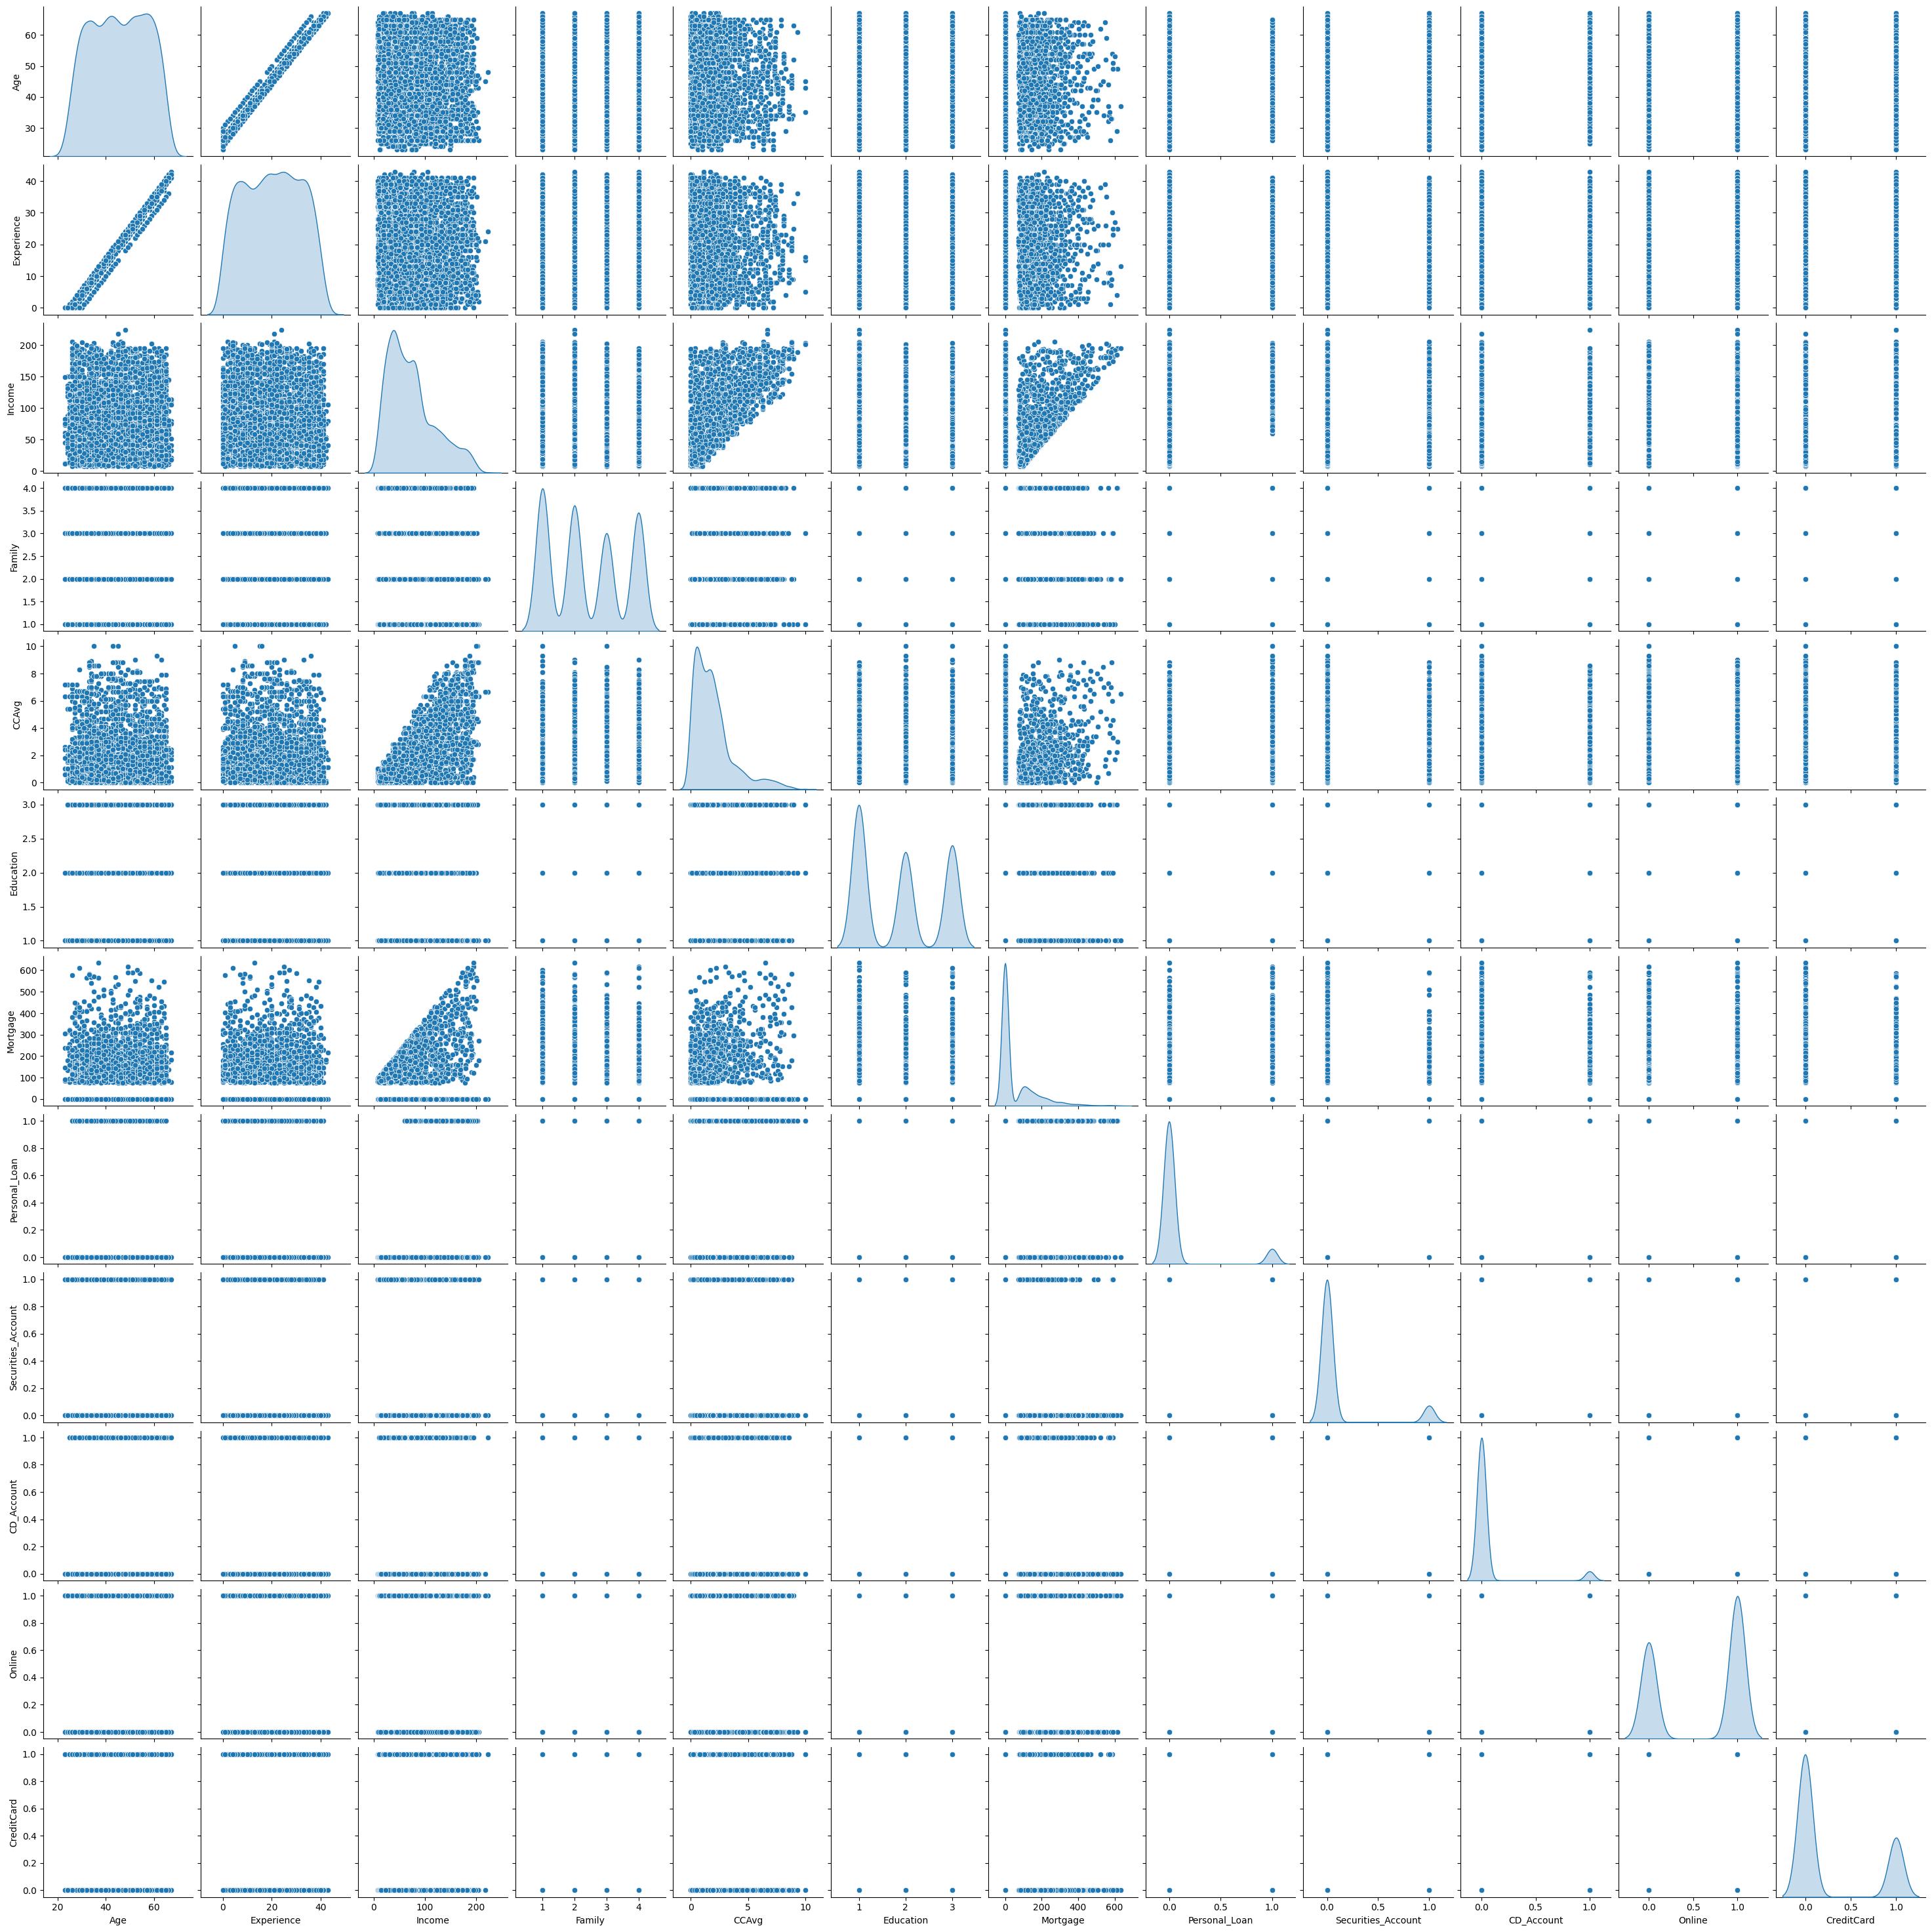

In [ ]:
# Shows a pairplot of all numerical and categorical variables in the dataset
sns.pairplot(data, diag_kind='kde')

In [ ]:
# Shows the 2-D Correlation Matrix:
corr = data.corr()
corr

Age  Experience    Income    Family     CCAvg  \
Age                 1.000000    0.994198 -0.055269 -0.046418 -0.052012   
Experience          0.994198    1.000000 -0.046729 -0.052213 -0.049912   
Income             -0.055269   -0.046729  1.000000 -0.157501  0.645984   
Family             -0.046418   -0.052213 -0.157501  1.000000 -0.109275   
CCAvg              -0.052012   -0.049912  0.645984 -0.109275  1.000000   
Education           0.041334    0.013536 -0.187524  0.064929 -0.136124   
Mortgage           -0.012539   -0.010840  0.206806 -0.020445  0.109905   
Personal_Loan      -0.007726   -0.007858  0.502462  0.061367  0.366889   
Securities_Account -0.000436   -0.001111 -0.002616  0.019994  0.015086   
CD_Account          0.008043    0.010046  0.169738  0.014110  0.136534   
Online              0.013702    0.013975  0.014206  0.010354 -0.003611   
CreditCard          0.007681    0.008910 -0.002385  0.011588 -0.006689   

                    Education  Mortgage  Personal_Loan  Securities_Account  \
Age                  0.041334 -0.012539      -0.007726           -0.000436   
Experience           0.013536 -0.010840      -0.007858           -0.001111   
Income              -0.187524  0.206806       0.502462           -0.002616   
Family               0.064929 -0.020445       0.061367            0.019994   
CCAvg               -0.136124  0.109905       0.366889            0.015086   
Education            1.000000 -0.033327       0.136722           -0.010812   
Mortgage            -0.033327  1.000000       0.142095           -0.005411   
Personal_Loan        0.136722  0.142095       1.000000            0.021954   
Securities_Account  -0.010812 -0.005411       0.021954            1.000000   
CD_Account           0.013934  0.089311       0.316355            0.317034   
Online              -0.015004 -0.005995       0.006278            0.012627   
CreditCard          -0.011014 -0.007231       0.002802           -0.015028   

                    CD_Account    Online  CreditCard  
Age                   0.008043  0.013702    0.007681  
Experience            0.010046  0.013975    0.008910  
Income                0.169738  0.014206   -0.002385  
Family                0.014110  0.010354    0.011588  
CCAvg                 0.136534 -0.003611   -0.006689  
Education             0.013934 -0.015004   -0.011014  
Mortgage              0.089311 -0.005995   -0.007231  
Personal_Loan         0.316355  0.006278    0.002802  
Securities_Account    0.317034  0.012627   -0.015028  
CD_Account            1.000000  0.175880    0.278644  
Online                0.175880  1.000000    0.004210  
CreditCard            0.278644  0.004210    1.000000

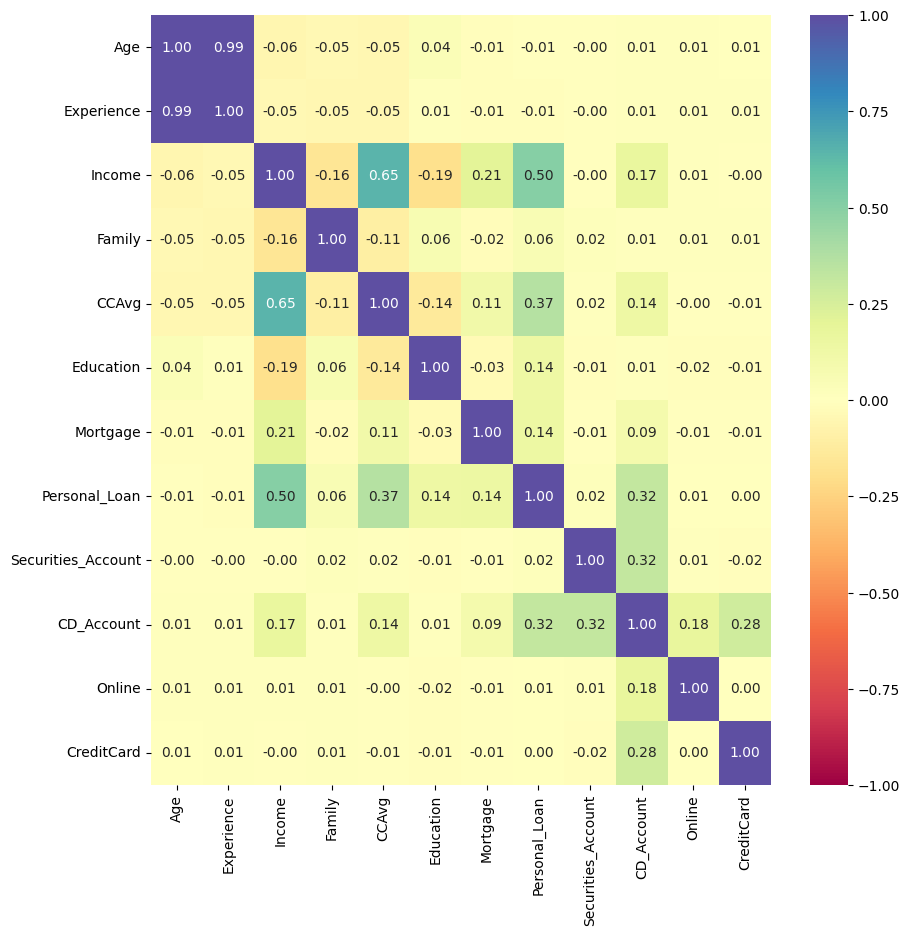

In [ ]:
# Shows the heatmap using the data from the 2-D correlation matrix
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

* Age and Experience are highly correlated.
* Income and CCAvg also has the highest correlation.
* Mortgage and CD_Account are the least correlated variables.

In [ ]:
# As referenced by Loan Delinquent Analysis case study provided by Great Learning
# User-defined function to create a stacked plot:
def stackedbarplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(20, 6))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()


In [ ]:
# As referenced by Loan Delinquent case study provided by Great Learning
# User-defined function to create boxplot and histogram categorized by target variable, Personal_Loan
def visualize_distribution_and_boxplot(df, feature_col, target_col, fig_dimensions=(10, 7)):
    """
    Plot histograms and boxplots for a specified feature, categorized by target variable.

    Parameters:
    df: pandas DataFrame
        The input dataset containing the feature and target columns
    feature_col: str
        The column name of the feature to visualize
    target_col: str
        The column name of the target variable for categorization
    fig_dimensions: tuple, optional
        The size of the figure in inches, default: (10, 7)
    """
    # Create a 2x2 subplot layout
    fig, axes = plt.subplots(2, 2, figsize=fig_dimensions)

    unique_targets = df[target_col].unique()

    # First histogram for the first unique target
    axes[0, 0].set_title(f'Distribution of {feature_col} when {target_col} = {unique_targets[0]}', fontsize=11)
    sns.histplot(
        data=df[df[target_col] == unique_targets[0]],
        x=feature_col,
        kde=True,
        ax=axes[0, 0],
        color='teal',
        stat='density'
    )
     # Second histogram for the second unique target
    axes[0, 1].set_title(f'Distribution of {feature_col} when {target_col} = {unique_targets[1]}', fontsize=11)
    sns.histplot(
        data=df[df[target_col] == unique_targets[1]],
        x=feature_col,
        kde=True,
        ax=axes[0, 1],
        color='orange',
        stat='density'
    )

    # Boxplot with respect to the target variable
    axes[1, 0].set_title(f'Boxplot of {feature_col} by {target_col}', fontsize=11)
    sns.boxplot(
        data=df,
        x=target_col,
        y=feature_col,
        ax=axes[1, 0],
        palette='Set2'
    )

    # Boxplot without outliers
    axes[1, 1].set_title(f'Boxplot (Excluding Outliers) of {feature_col} by {target_col}', fontsize=11)
    sns.boxplot(
        data=df,
        x=target_col,
        y=feature_col,
        ax=axes[1, 1],
        showfliers=False,
        palette='Set2'
    )

    # Adjust layout for clarity
    plt.tight_layout()
    plt.show()


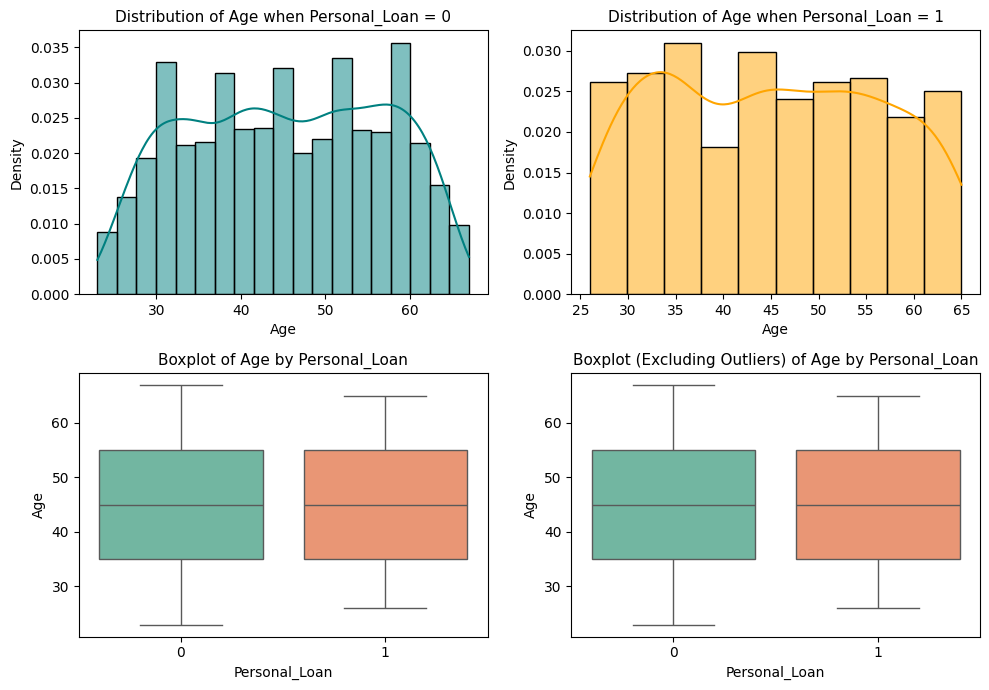

In [ ]:
# Shows the histogram and boxplot of Age by Personal Loan
visualize_distribution_and_boxplot(data, 'Age', 'Personal_Loan')

* Younger customers preferably those in their 30s to 40s accept personal loans from the bank
* The average age of those accepting the loan is 45 years old


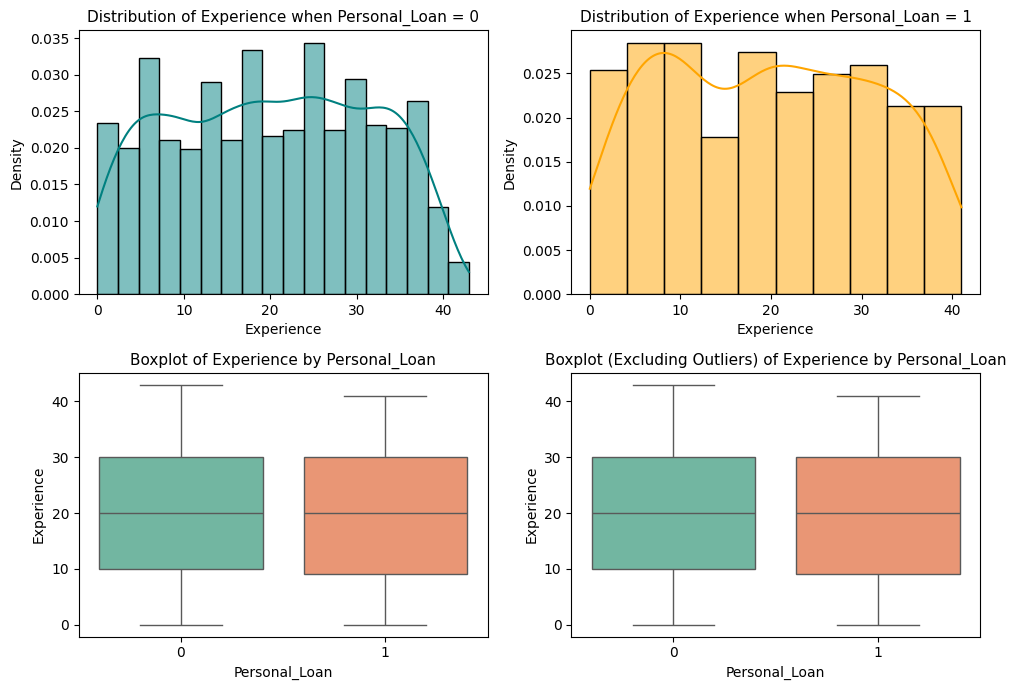

In [ ]:
# Shows the histogram and boxplot of Experience by Personal Loan
visualize_distribution_and_boxplot(data, 'Experience', 'Personal_Loan')

* Customers who have 10 years of experience tend to accept personal loan

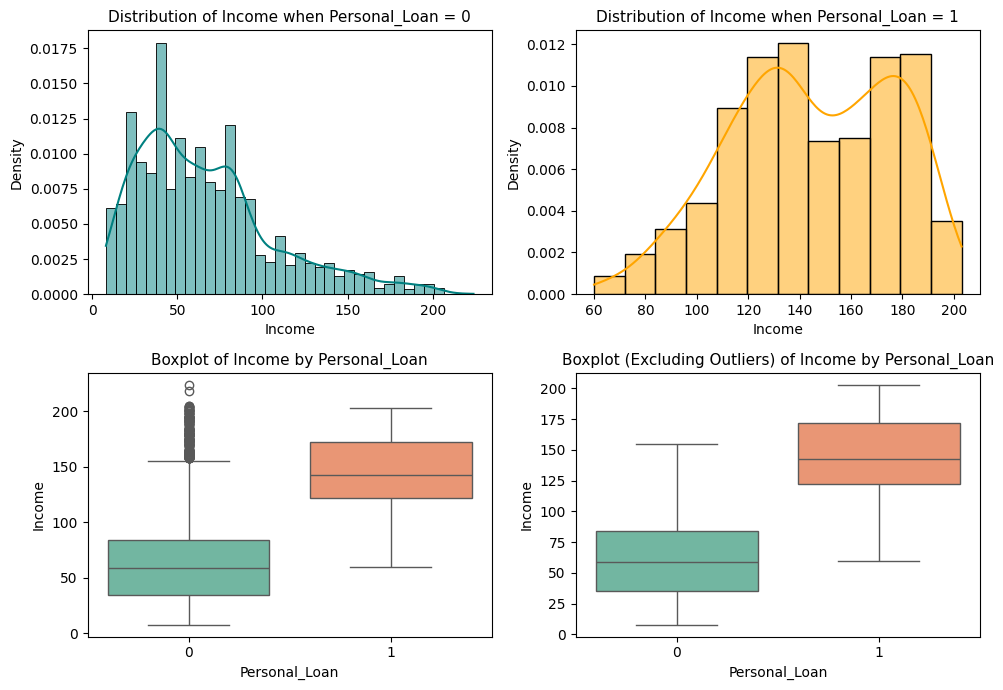

In [ ]:
# Shows the histogram and boxplot of Income by Personal Loan
visualize_distribution_and_boxplot(data, 'Income', 'Personal_Loan')

* The boxplot for those who reject the loan has outliers in the distribution
* The average income of customers who accept personal loans is between USD125k - 150k.

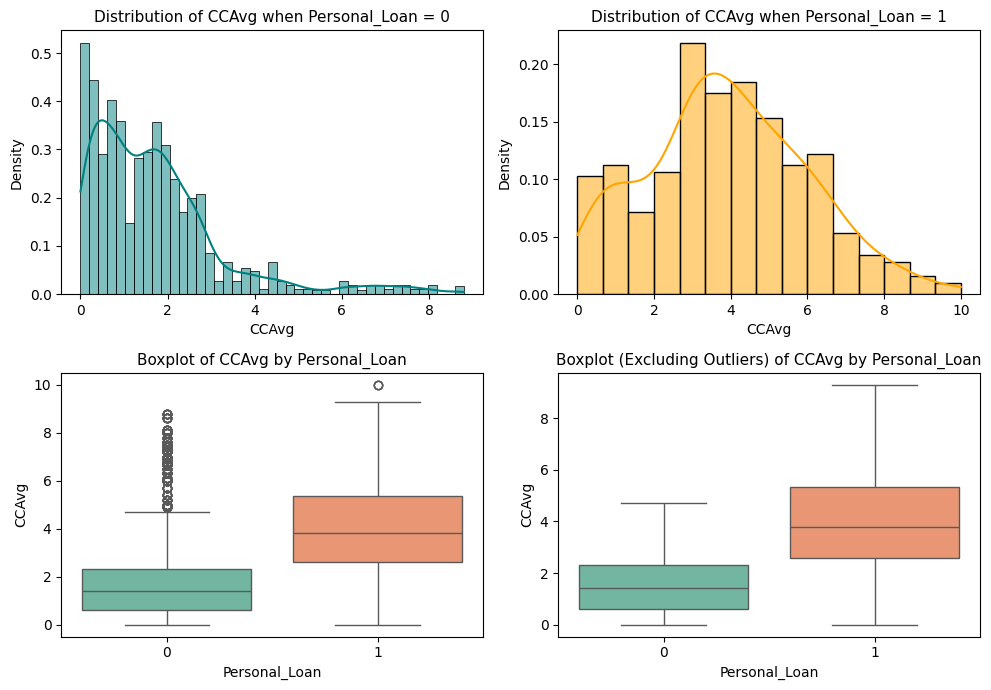

In [ ]:
# Shows the histogram and boxplot of CCAvg by Personal Loan
visualize_distribution_and_boxplot(data, 'CCAvg', 'Personal_Loan')

* The boxplot for those who reject the loan has outliers.
* The median CCAvg is higher in the boxplot for those who accept the loan.

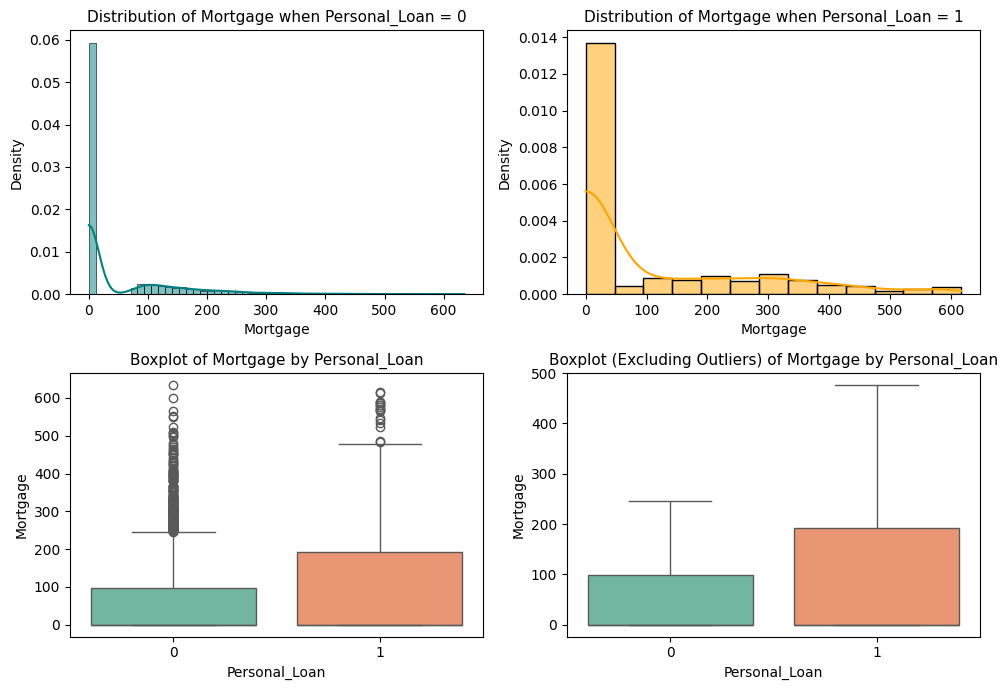

In [ ]:
# Shows the histogram and boxplot of Mortgage by Personal Loan
visualize_distribution_and_boxplot(data, 'Mortgage', 'Personal_Loan')

* Both boxplots have noticeable outliers.
* The histogram for mortgage has a right skewed distribution.

###Personal Loan vs. Age

Personal_Loan     0    1   All
Age                           
All            4520  480  5000
34              116   18   134
30              119   17   136
36               91   16   107
63               92   16   108
35              135   16   151
33              105   15   120
52              130   15   145
29              108   15   123
54              128   15   143
43              134   15   149
42              112   14   126
56              121   14   135
65               66   14    80
44              107   14   121
50              125   13   138
45              114   13   127
46              114   13   127
26               65   13    78
32              108   12   120
57              120   12   132
38              103   12   115
27               79   12    91
48              106   12   118
61              110   12   122
53              101   11   112
51              119   10   129
60              117   10   127
58              133   10   143
49              105   10   115
47      

<Figure size 1000x1000 with 0 Axes>

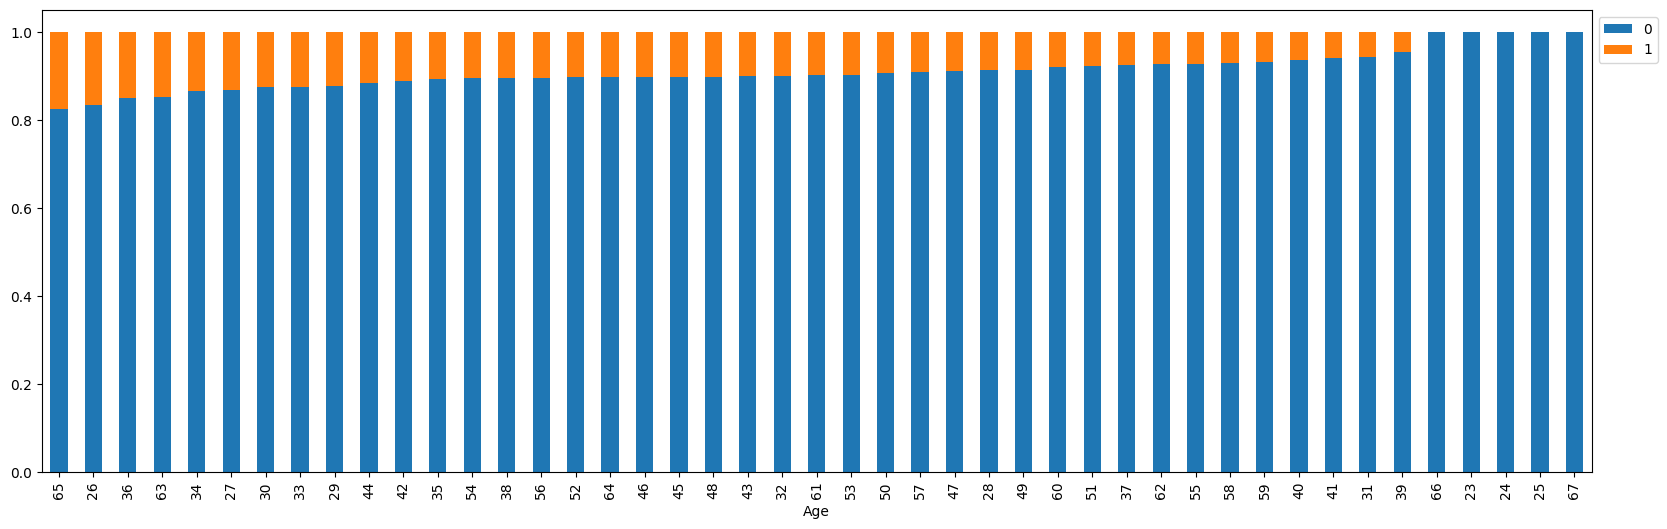

In [ ]:
plt.figure(figsize=(10, 10))
stackedbarplot(data, 'Age', 'Personal_Loan')

###Personal Loan vs. Experience

Personal_Loan     0    1   All
Experience                    
All            4520  480  5000
9               127   20   147
8               101   18   119
3               112   17   129
20              131   17   148
12               86   16   102
5               132   14   146
32              140   14   154
26              120   14   134
25              128   14   142
19              121   14   135
16              114   13   127
37              103   13   116
35              130   13   143
30              113   13   126
23              131   13   144
22              111   13   124
11              103   13   116
31               92   12   104
36              102   12   114
6               107   12   119
18              125   12   137
7               109   12   121
29              112   12   124
28              127   11   138
17              114   11   125
13              106   11   117
21              102   11   113
39               75   10    85
34              115   10   125
27      

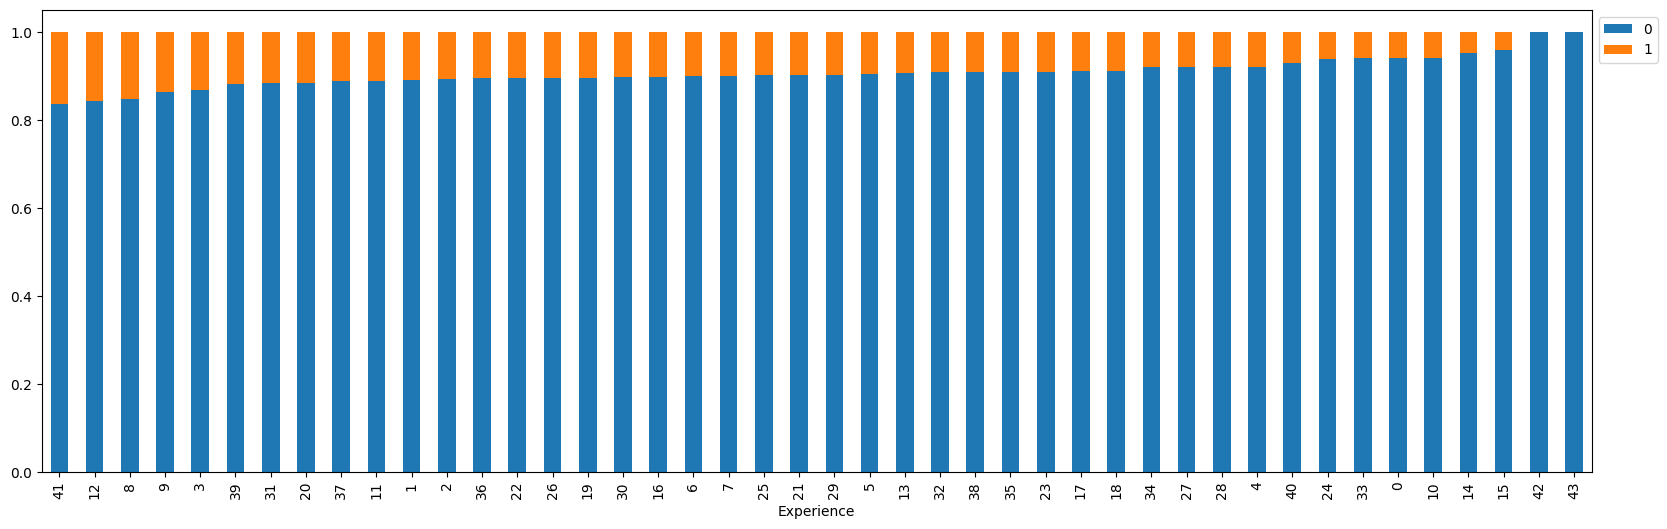

In [ ]:
# Shows the stacked barplot for Experience vs. Personal Loan
stackedbarplot(data, 'Experience', 'Personal_Loan')

###Personal Loan vs. Family

Personal_Loan     0    1   All
Family                        
All            4520  480  5000
4              1088  134  1222
3               877  133  1010
1              1365  107  1472
2              1190  106  1296
------------------------------------------------------------------------------------------------------------------------


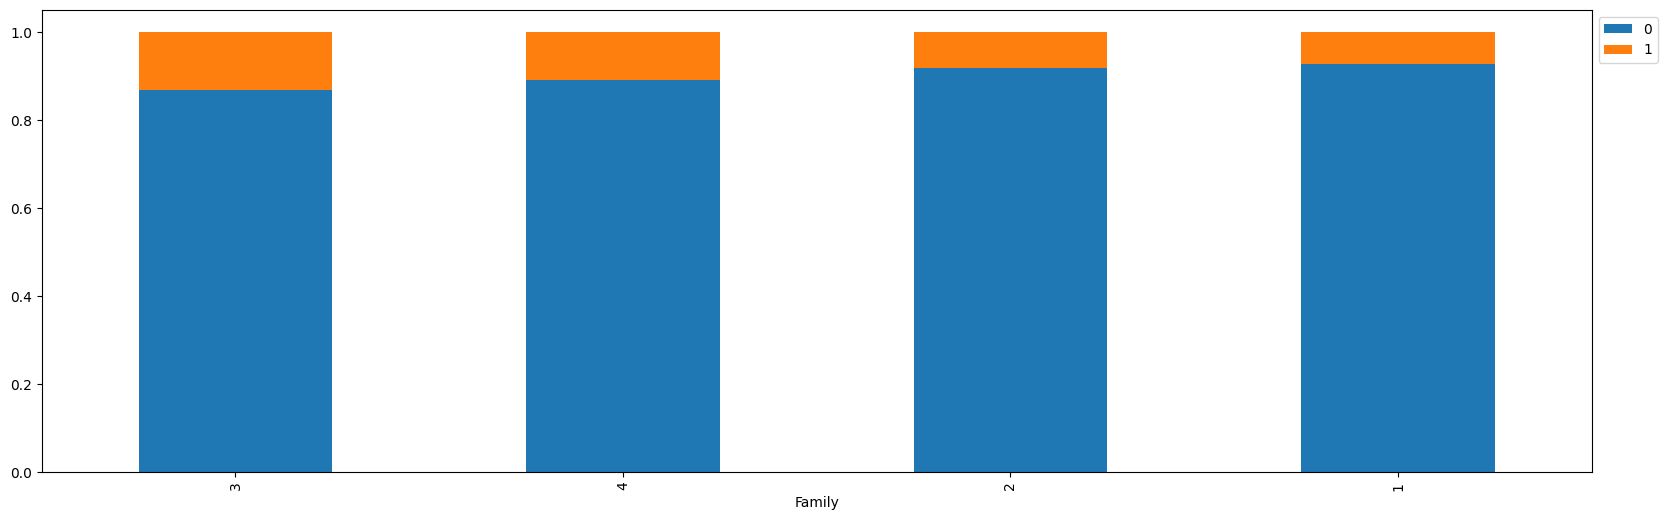

In [ ]:
# Shows the stacked bar plot for Family vs. Personal Loan
stackedbarplot(data, 'Family', 'Personal_Loan')

<Axes: xlabel='Personal_Loan', ylabel='Family'>

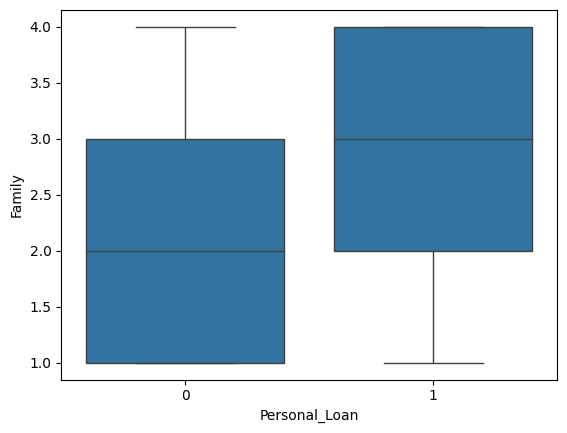

In [ ]:
# Shows the boxplot for Family vs. Personal Loan
sns.boxplot(data=data, x='Personal_Loan', y='Family')

* A family with more than 2 members tend to accept a loan from the bank.
* A family with less than 2 members tend to decline a loan from the bank.

###Personal Loan vs. CCAvg

Personal_Loan     0    1   All
CCAvg                         
All            4520  480  5000
3.0              34   19    53
4.1               9   13    22
3.4              26   13    39
3.1               8   12    20
...             ...  ...   ...
1.67             18    0    18
1.75              9    0     9
7.8               9    0     9
7.6               9    0     9
2.33             18    0    18

[109 rows x 3 columns]
------------------------------------------------------------------------------------------------------------------------


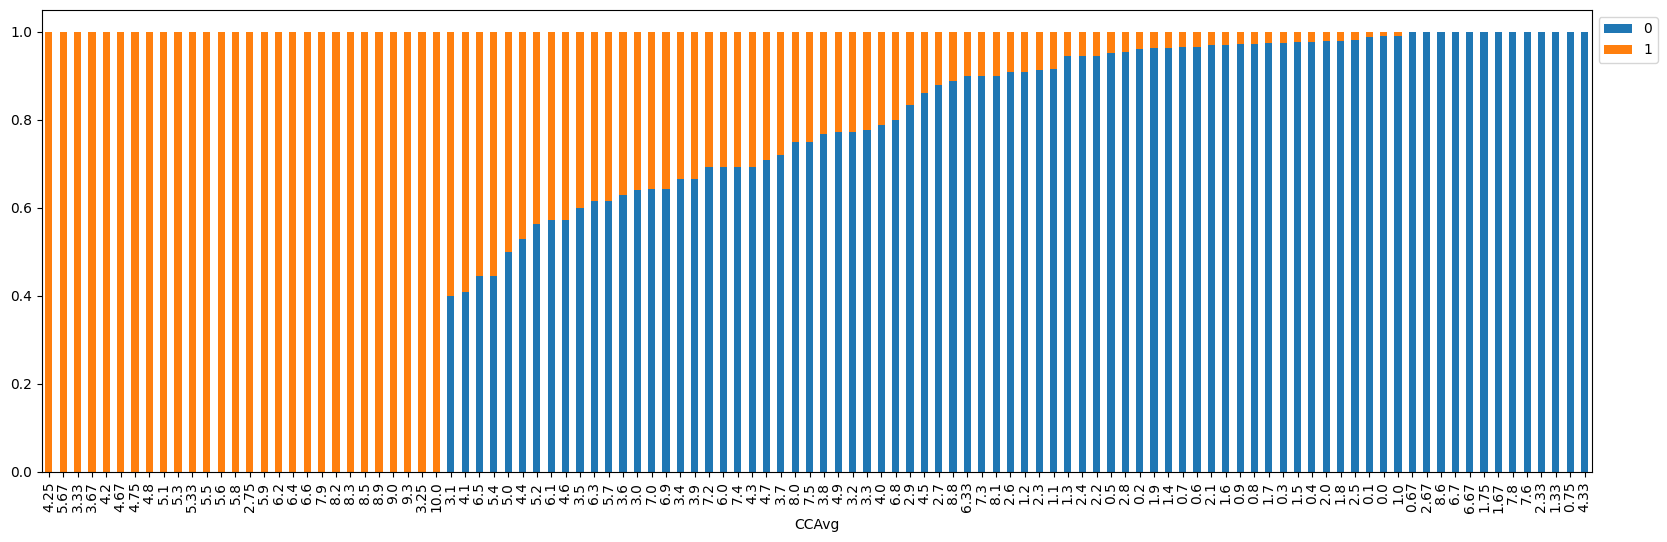

In [ ]:
stackedbarplot(data, 'CCAvg', 'Personal_Loan')

###Personal Loan vs. Education

Personal_Loan     0    1   All
Education                     
All            4520  480  5000
3              1296  205  1501
2              1221  182  1403
1              2003   93  2096
------------------------------------------------------------------------------------------------------------------------


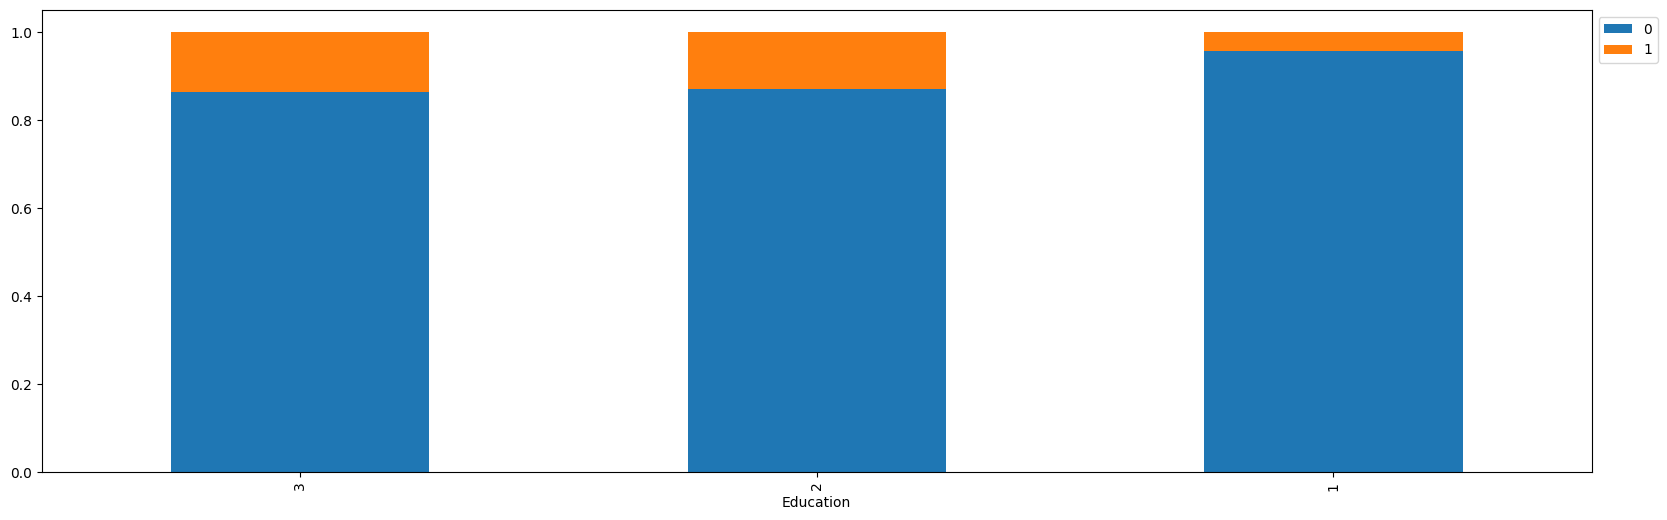

In [ ]:
stackedbarplot(data, 'Education', 'Personal_Loan')

* Customers who are highly educated with professional degrees tend to accept personal loans

###Personal Loan vs. Mortgage

Personal_Loan     0    1   All
Mortgage                      
All            4520  480  5000
0              3150  312  3462
301               0    5     5
342               1    3     4
282               0    3     3
...             ...  ...   ...
276               2    0     2
156               5    0     5
278               1    0     1
280               2    0     2
248               3    0     3

[348 rows x 3 columns]
------------------------------------------------------------------------------------------------------------------------


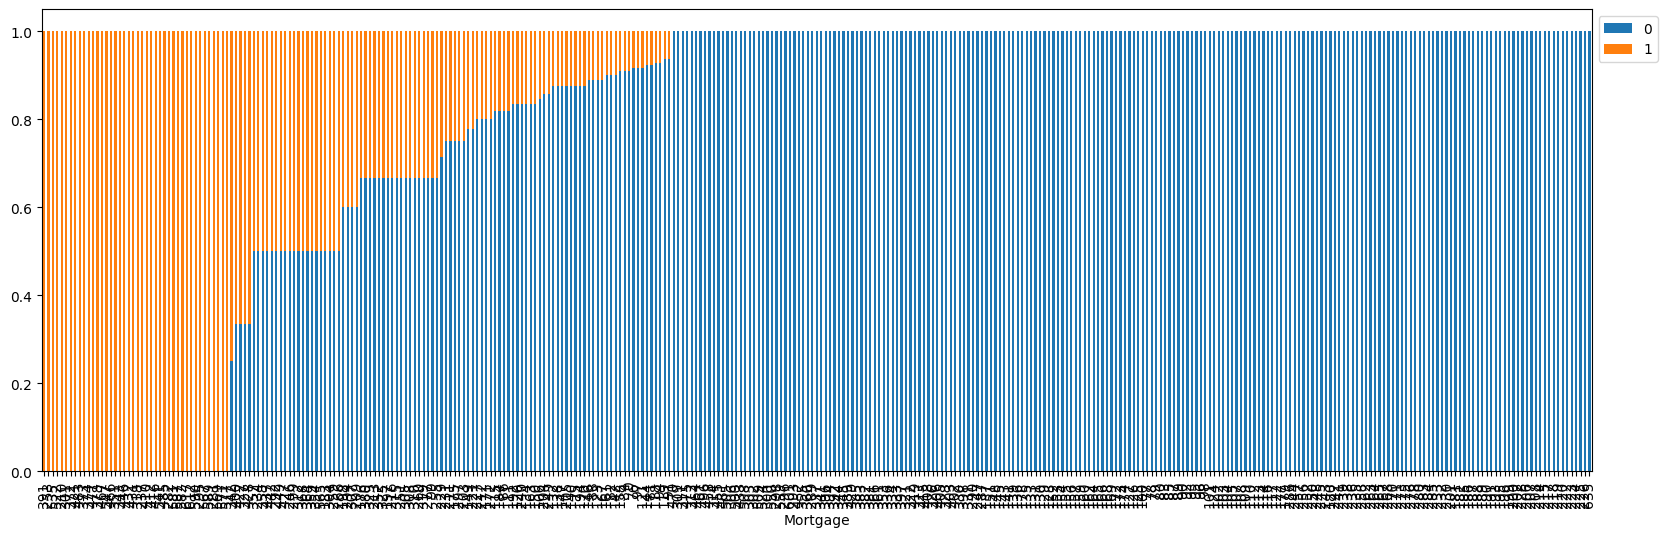

In [ ]:
# Shows the stacked bar plot for Mortgage vs. Personal Loan
stackedbarplot(data, 'Mortgage', 'Personal_Loan')

###Personal Loan vs. Securities_Account

Personal_Loan          0    1   All
Securities_Account                 
All                 4520  480  5000
0                   4058  420  4478
1                    462   60   522
------------------------------------------------------------------------------------------------------------------------


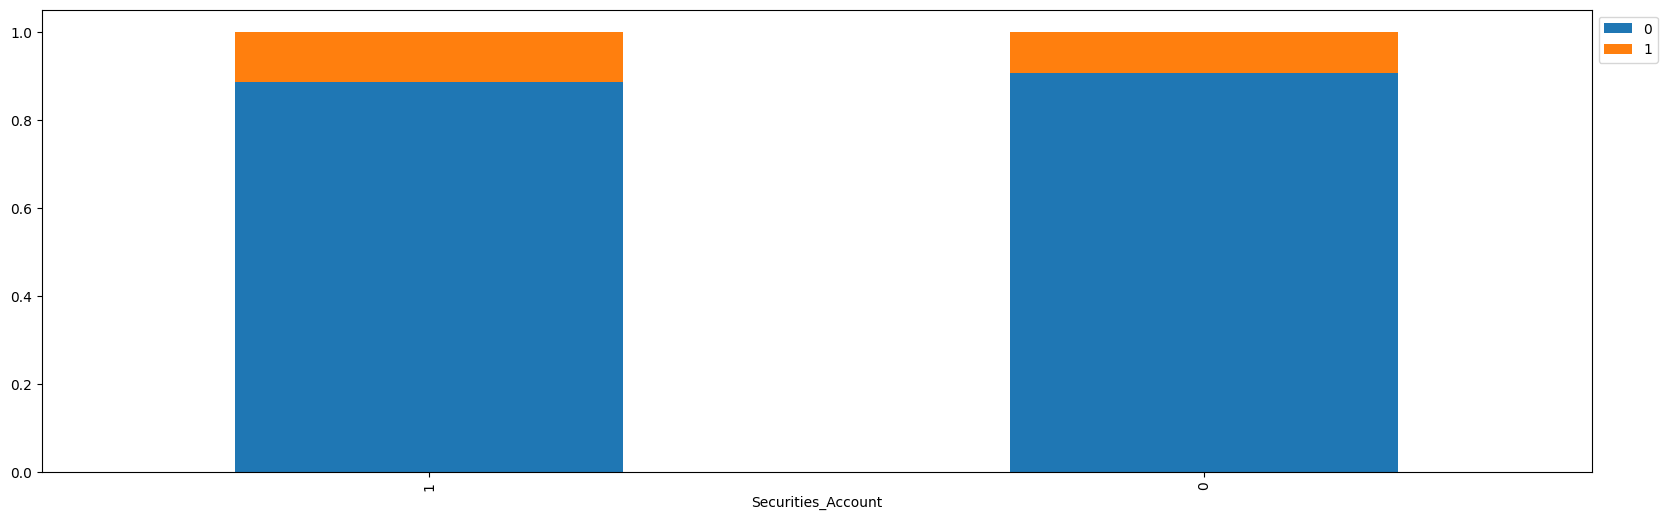

In [ ]:
# Shows the stacked bar plot for Securities_Account vs. Personal Loan
stackedbarplot(data, 'Securities_Account', 'Personal_Loan')

###Personal Loan vs. Online

Personal_Loan     0    1   All
Online                        
All            4520  480  5000
1              2693  291  2984
0              1827  189  2016
------------------------------------------------------------------------------------------------------------------------


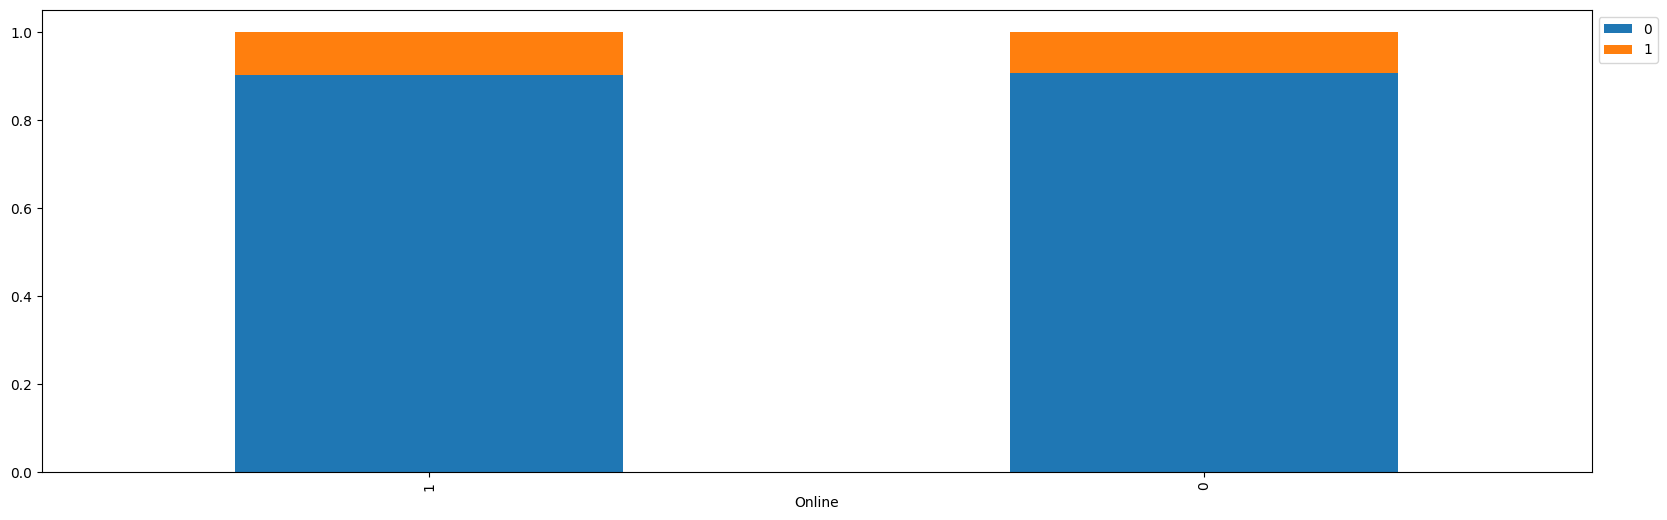

In [ ]:
# Shows stacked bar plot for Online vs. Personal_Loan
stackedbarplot(data, 'Online', 'Personal_Loan')

###Personal Loan vs. Credit Card

Personal_Loan     0    1   All
CreditCard                    
All            4520  480  5000
0              3193  337  3530
1              1327  143  1470
------------------------------------------------------------------------------------------------------------------------


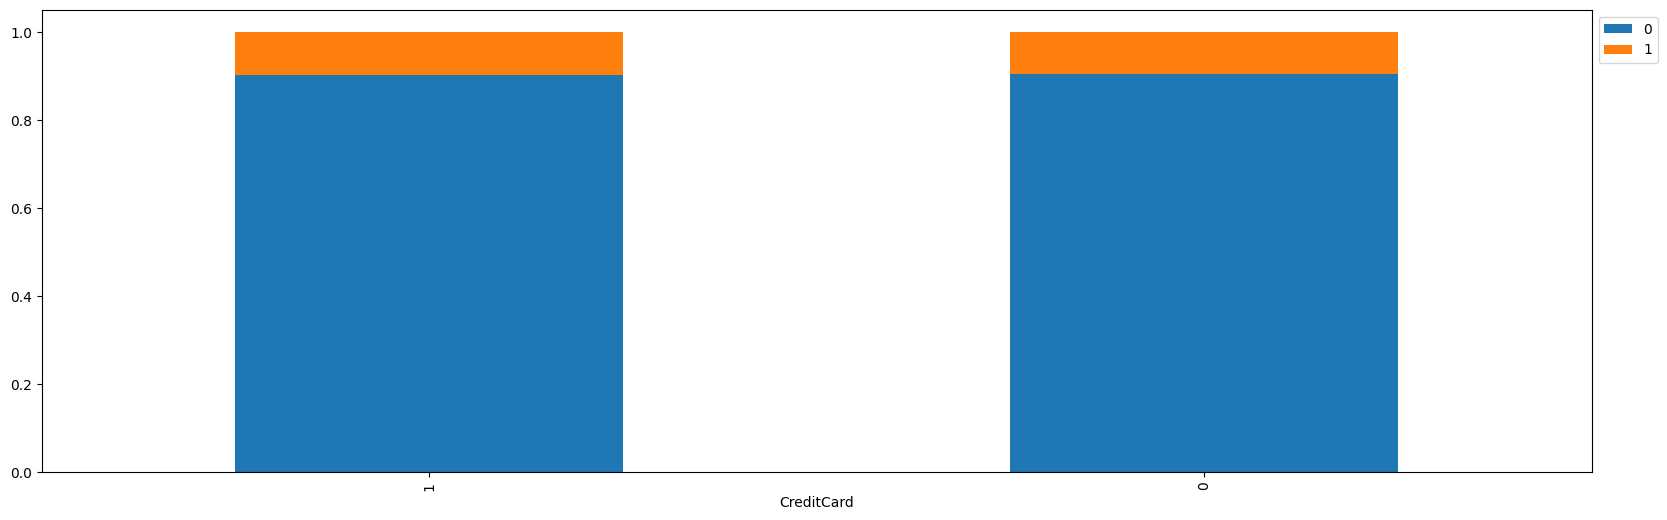

In [ ]:
# Shows the stacked bar plot for CreditCard vs. Personal_Loan
stackedbarplot(data, 'CreditCard', 'Personal_Loan')

In [ ]:
# Shows the statistical summary of all columns for those who took a loan
data[data['Personal_Loan'] == 1].describe(include = 'all').T

count        mean         std   min    25%    50%  \
Age                 480.0   45.066667   11.590964  26.0   35.0   45.0   
Experience          480.0   19.843750   11.582443   0.0    9.0   20.0   
Income              480.0  144.745833   31.584429  60.0  122.0  142.5   
Family              480.0    2.612500    1.115393   1.0    2.0    3.0   
CCAvg               480.0    3.905354    2.097681   0.0    2.6    3.8   
Education           480.0    2.233333    0.753373   1.0    2.0    2.0   
Mortgage            480.0  100.845833  160.847862   0.0    0.0    0.0   
Personal_Loan       480.0    1.000000    0.000000   1.0    1.0    1.0   
Securities_Account  480.0    0.125000    0.331064   0.0    0.0    0.0   
CD_Account          480.0    0.291667    0.455004   0.0    0.0    0.0   
Online              480.0    0.606250    0.489090   0.0    0.0    1.0   
CreditCard          480.0    0.297917    0.457820   0.0    0.0    0.0   

                         75%    max  
Age                  55.0000   65.0  
Experience           30.0000   41.0  
Income              172.0000  203.0  
Family                4.0000    4.0  
CCAvg                 5.3475   10.0  
Education             3.0000    3.0  
Mortgage            192.5000  617.0  
Personal_Loan         1.0000    1.0  
Securities_Account    0.0000    1.0  
CD_Account            1.0000    1.0  
Online                1.0000    1.0  
CreditCard            1.0000    1.0

* The youngest customer to accept a personal loan is 26 years old with an annual income of USD60k.
* Customers with 2 or more family members tend to accept a personal loan.
* The average customer is not using online facilities provided by the bank.
* Most customers who accept the loan do not have a Securities account, CD Account or Credit Card.

In [ ]:
# Shows the statistical summary of allcolumns for those who rejected the loan
data[data['Personal_Loan'] == 0].describe(include = 'all').T

count       mean        std   min   25%   50%   75%  \
Age                 4520.0  45.367257  11.450427  23.0  35.0  45.0  55.0   
Experience          4520.0  20.148894  11.426210   0.0  10.0  20.0  30.0   
Income              4520.0  66.237389  40.578534   8.0  35.0  59.0  84.0   
Family              4520.0   2.373451   1.148771   1.0   1.0   2.0   3.0   
CCAvg               4520.0   1.729009   1.567647   0.0   0.6   1.4   2.3   
Education           4520.0   1.843584   0.839975   1.0   1.0   2.0   3.0   
Mortgage            4520.0  51.789381  92.038931   0.0   0.0   0.0  98.0   
Personal_Loan       4520.0   0.000000   0.000000   0.0   0.0   0.0   0.0   
Securities_Account  4520.0   0.102212   0.302961   0.0   0.0   0.0   0.0   
CD_Account          4520.0   0.035841   0.185913   0.0   0.0   0.0   0.0   
Online              4520.0   0.595796   0.490792   0.0   0.0   1.0   1.0   
CreditCard          4520.0   0.293584   0.455454   0.0   0.0   0.0   1.0   

                      max  
Age                  67.0  
Experience           43.0  
Income              224.0  
Family                4.0  
CCAvg                 8.8  
Education             3.0  
Mortgage            635.0  
Personal_Loan         0.0  
Securities_Account    1.0  
CD_Account            1.0  
Online                1.0  
CreditCard            1.0

* Customers who tend to reject the loan are approximately 45 years old.
* Income and Mortgage has the highest standard deviation.
* Customers with an undergraduate degree tend to reject a loan from the bank.

## Data Preprocessing

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

###Outlier Detection using IQR

In [ ]:
# Outlier Detection using IQR
def detect_outliers_iqr(data, column):
    """
    Detect outliers in a DataFrame column using IQR method.

    Parameters:
    data (pd.DataFrame): The DataFrame containing the data.
    column (str): The column name for which to detect outliers.

    Returns:
    pd.Series: A boolean Series where True indicates an outlier.
    """
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)

    # Calculate IQR
    IQR = Q3 - Q1

    # Determine the outlier bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    is_outlier = (data[column] < lower_bound) | (data[column] > upper_bound)

    return is_outlier

###Outlier Treatment

Processing column: ID
Processing column: Age
Processing column: Experience
Processing column: Income
Processing column: ZIPCode
Processing column: CCAvg
Processing column: Mortgage


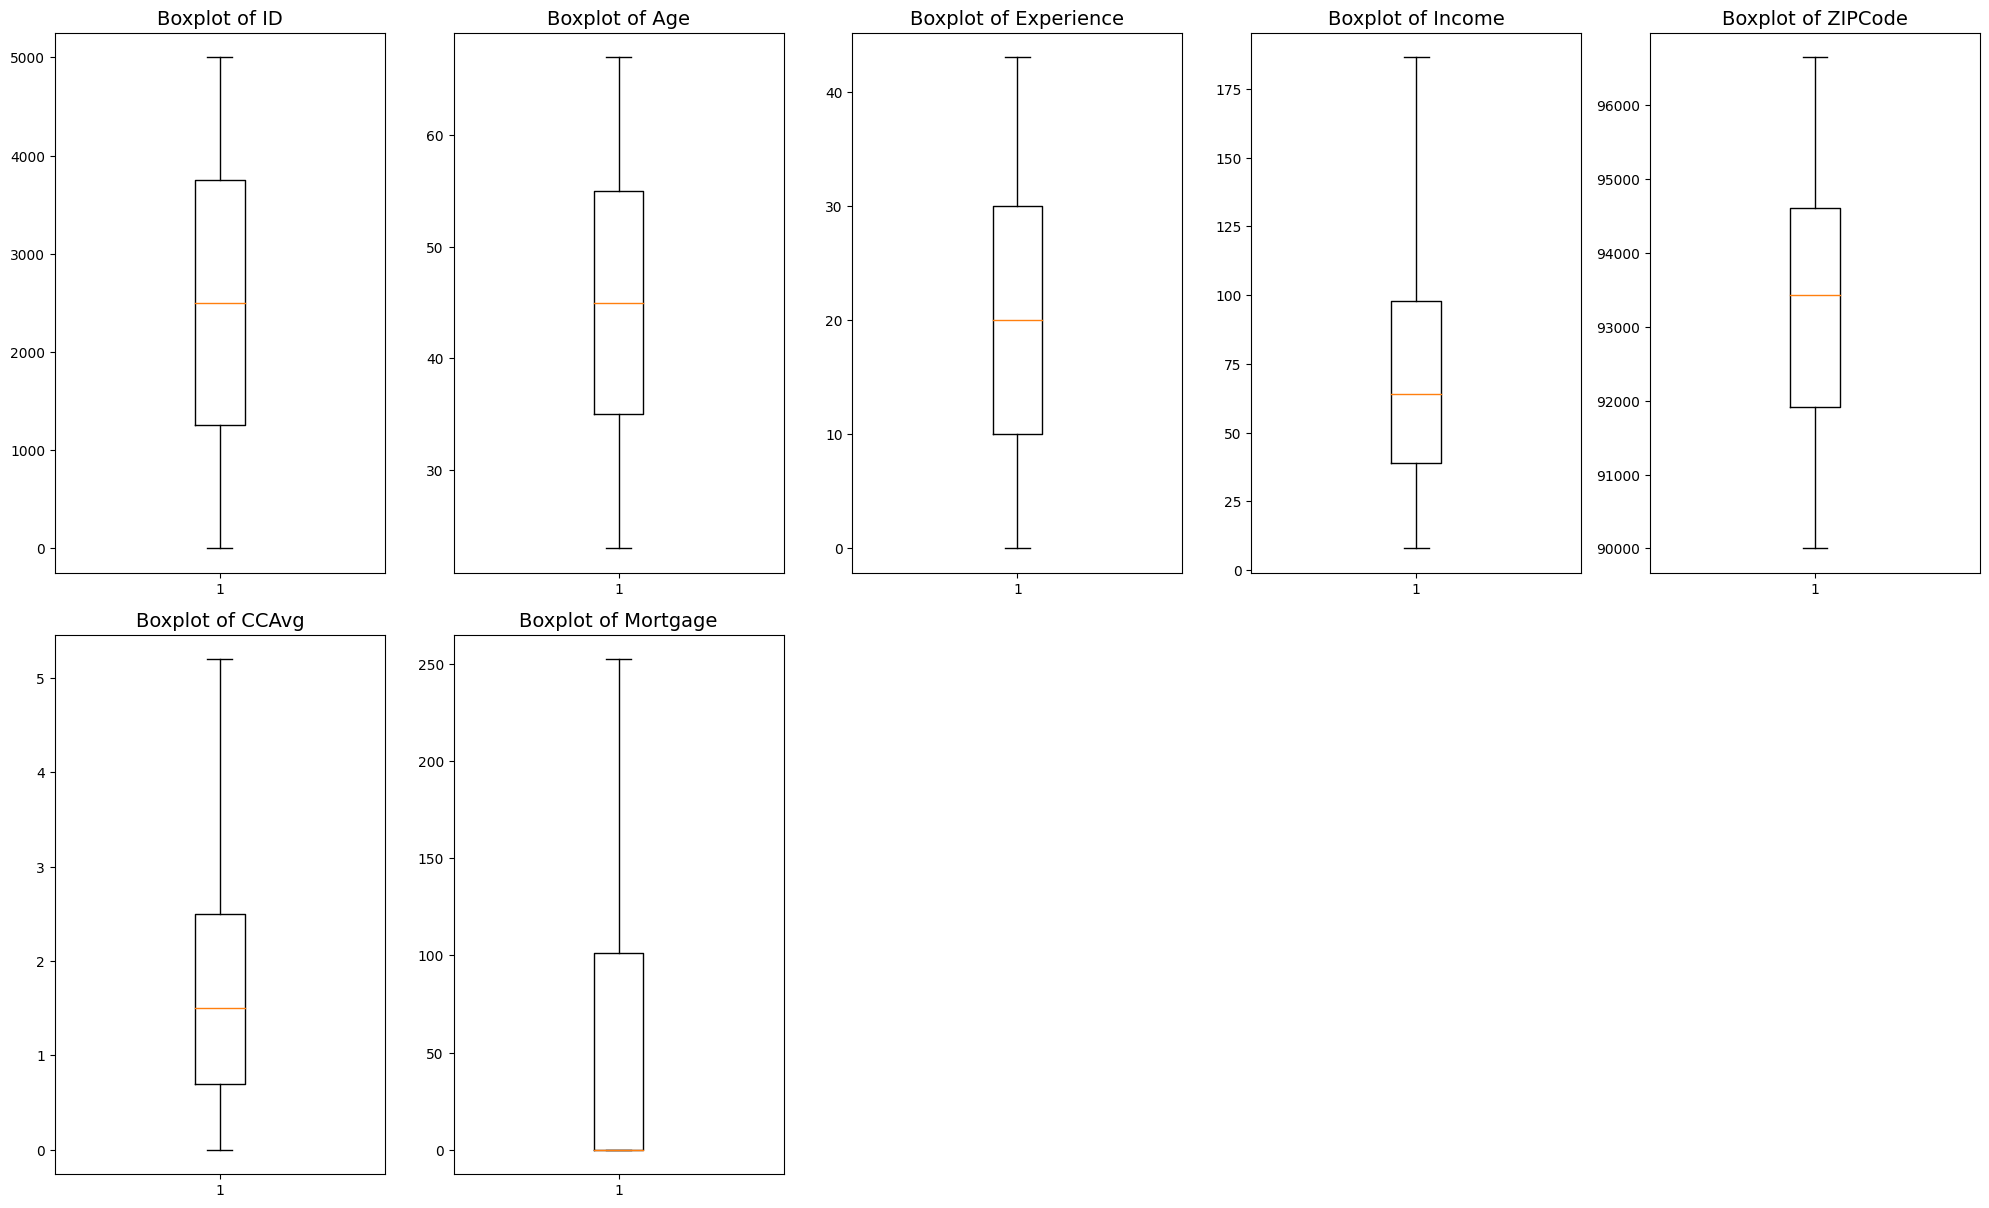

In [ ]:
# User-defined function to treat outliers using IQR
def cap_outliers(dataframe, column_name):
    """
    Capping outliers based on the IQR method.

    Parameters:
    dataframe: pd.DataFrame
        The dataset containing the feature.
    column_name: str
        The name of the numeric column to treat for outliers.

    Returns:
    pd.DataFrame
        The modified DataFrame with outliers capped.
    """
    # Calculate the first and third quartiles
    Q1 = dataframe[column_name].quantile(0.25)
    Q3 = dataframe[column_name].quantile(0.75)
    IQR = Q3 - Q1

    # Define the lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap the outliers
    dataframe[column_name] = np.where(dataframe[column_name] < lower_bound, lower_bound,
                                       np.where(dataframe[column_name] > upper_bound, upper_bound,
                                                dataframe[column_name]))

    return dataframe

def cap_outliers_in_columns(dataframe, columns):
    """
    Apply outlier capping to multiple columns in the DataFrame.

    Parameters:
    dataframe: pd.DataFrame
        The dataset containing the features.
    columns: list
        List of column names to treat for outliers.

    Returns:
    pd.DataFrame
        The modified DataFrame with outliers capped in specified columns.
    """
    for col in columns:
        if col in dataframe.columns:  # Check if the column exists
            print(f"Processing column: {col}")  # Debugging line
            dataframe = cap_outliers(dataframe, col)
        else:
            print(f"Column '{col}' does not exist in the DataFrame. Skipping.")

    return dataframe

# Apply outlier treatment
df_treated = cap_outliers_in_columns(data, num_column)

# Visualizing the results
plt.figure(figsize=(20, 30))

for idx, col in enumerate(num_column):
    if col in df_treated.columns:  # Check if the column exists for plotting
        plt.subplot(5, 5, idx + 1)
        plt.boxplot(df_treated[col], whis=1.5)
        plt.title(f'Boxplot of {col}', fontsize=14)
        plt.grid(False)

plt.tight_layout()
plt.show()

In [ ]:
# Drops the ZIPCode and ID column only
data.drop(['ZIPCode', 'ID'], axis=1, inplace=True)

## Model Building-Decision Trees

### Model Evaluation Criterion

**Model can make wrong predictions such as:**
* Prediction that a customer will not accept a loan, but the said customer accepts the loan (False Negative) resulting in opportunity loss.
* Prediction that a customer will accept a loan, but the said customer rejects a loan (False Positive).

**Which case is more important?**
* The False Negative case is more important as opportunity loss will cause the bank to lose revenue and the said customer.
* If the bank focuses on False Positive cases, it will cause the bank to spent more on operations and resources to find potential customers

**How to reduce False Negatives?**
* The model must focus on maximizing the Recall, therefore reducing the False Negative cases among potential customers.



In [ ]:
# Split the data into train and test set
# Personal Loan is the target variable
X = data.drop('Personal_Loan', axis=1)
Y = data['Personal_Loan']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

# Checking the train and test data size
print(f'X_train data: {X_train.shape}')
print(f'X_test data: {X_test.shape}')
print(f'Y_train data: {Y_train.shape}')
print(f'Y_test data: {Y_test.shape}')


X_train data: (3500, 11)
X_test data: (1500, 11)
Y_train data: (3500,)
Y_test data: (1500,)


In [ ]:
# Shows the percent of classes in the training and testing set
print("Percentage of Data in Training Set:")
print(Y_train.value_counts(normalize=True)*100)
print("Percent of Data in Test Set:")
print(Y_test.value_counts(normalize=True)*100)

Percentage of Data in Training Set:
Personal_Loan
0    90.542857
1     9.457143
Name: proportion, dtype: float64
Percent of Data in Test Set:
Personal_Loan
0    90.066667
1     9.933333
Name: proportion, dtype: float64


In [ ]:
# Creates the default decision tree using DecisionTreeClassifier
dTree_model = DecisionTreeClassifier(criterion="gini", class_weight={0:0.15, 1: 0.85}, random_state=1)
dTree_model.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight={0: 0.15, 1: 0.85}, random_state=1)

In [ ]:
# As referenced by Loan Delinquent Analysis case study provided by Great Learning
def dTree_model_confusion_matrix(model, X, y, labels=None):
    """
    Create and display a confusion matrix heatmap for a Decision Tree model.

    Parameters:
    model: classifier object
        The trained Decision Tree model.
    X: array-like or DataFrame
        Independent variables for prediction.
    y: array-like
        True labels for the data.
    labels: list, optional
        List of label names. If None, labels will be inferred from the data.

    Returns:
    Confusion matrix with annotations.
    """
    # Predict the target variable
    y_pred = model.predict(X)

    # Compute confusion matrix
    cm = confusion_matrix(y, y_pred, labels=labels)

    # Calculate percentages
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    # Prepare annotation labels
    annot = np.array([
        [f"{value}\n{value / cm.sum():.2%}" for value in row]
        for row in cm
    ])

    # Plot confusion matrix heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=annot, fmt='', cmap='Spectral',
                xticklabels=labels, yticklabels=labels)
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")
    plt.title("Confusion Matrix")
    plt.show()

In [ ]:
# As referenced by Loan Delinquent Analysis case study provided by Great Learning
def dTree_model_metrics(model, X, y, average='binary'):
    """
    Compute and return a DataFrame of classification metrics for the given model.

    Parameters:
    model: classifier object
        The trained classifier model.
    X: array-like or DataFrame
        Independent variables for prediction.
    y: array-like
        True labels for the data.
    average: str, optional
        The type of averaging performed on the data for multi-class classification.
        Options are 'binary', 'micro', 'macro', 'weighted'. Default is 'binary'.

    Returns:
    pd.DataFrame
        DataFrame containing the model metrics.
    """
    # Predict the target variable
    y_pred = model.predict(X)

    # Calculate metrics
    metrics = {
        "Accuracy": accuracy_score(y, y_pred),
        "Recall": recall_score(y, y_pred, average=average),
        "Precision": precision_score(y, y_pred, average=average),
        "F1 Score": f1_score(y, y_pred, average=average)
    }

    # Create a DataFrame of metrics
    metrics_classification = pd.DataFrame(metrics, index=[0])

    return metrics_classification

**Performance on Training Set**

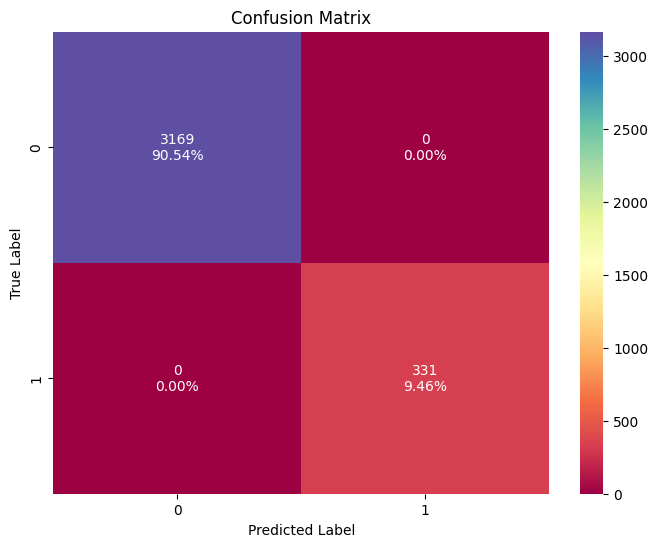

In [ ]:
# Shows the confusion matrix of train data for default decision tree
dTree_model_confusion_matrix(dTree_model, X_train, Y_train, labels=dTree_model.classes_)

In [ ]:
# Shows the model metrics of the training set of the default decision tree
dTree_model_default_train = dTree_model_metrics(dTree_model, X_train, Y_train, average='binary')
dTree_model_default_train

Accuracy  Recall  Precision  F1 Score
0       1.0     1.0        1.0       1.0

* The model metrics suggests that there are no Type I and II errors in the dataset.
* Since the model has an accuracy of 100%, the default decision tree is overfitting as the tree is growing without any hyperparameter tuning or cost complexity pruning.


**Perfomance on Testing Set**

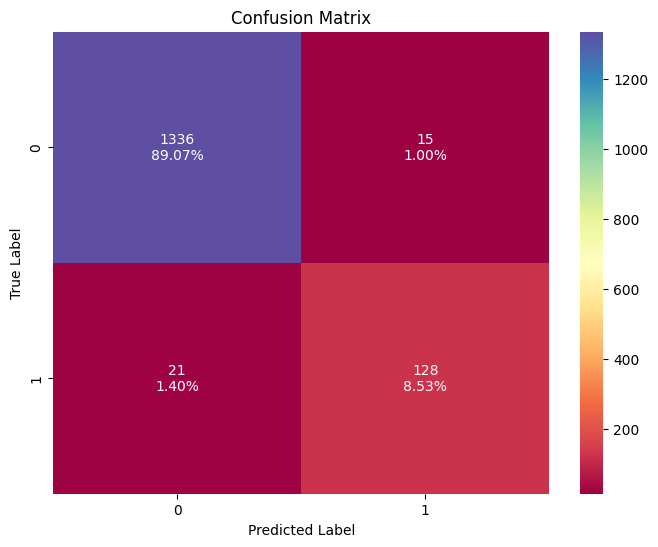

In [ ]:
# Applying the confusion matrix to the testing dataset:
dTree_model_confusion_matrix(dTree_model, X_test, Y_test, labels=dTree_model.classes_)

In [ ]:
# Checking the model metrics on the testing dataset
dTree_model_default_test = dTree_model_metrics(dTree_model, X_test, Y_test, average='binary')
dTree_model_default_test

Accuracy   Recall  Precision  F1 Score
0     0.976  0.85906   0.895105  0.876712

* The model has an accuracy of 97.6% on the test set.
* These metrics suggests that the model is overfitting due to the accuracy score on the test set
* The overall model performance is 87.67%

In [ ]:
# Displays feature names
col_name = list(X.columns)
feature_names = col_name
feature_names

['Age',
 'Experience',
 'Income',
 'Family',
 'CCAvg',
 'Education',
 'Mortgage',
 'Securities_Account',
 'CD_Account',
 'Online',
 'CreditCard']

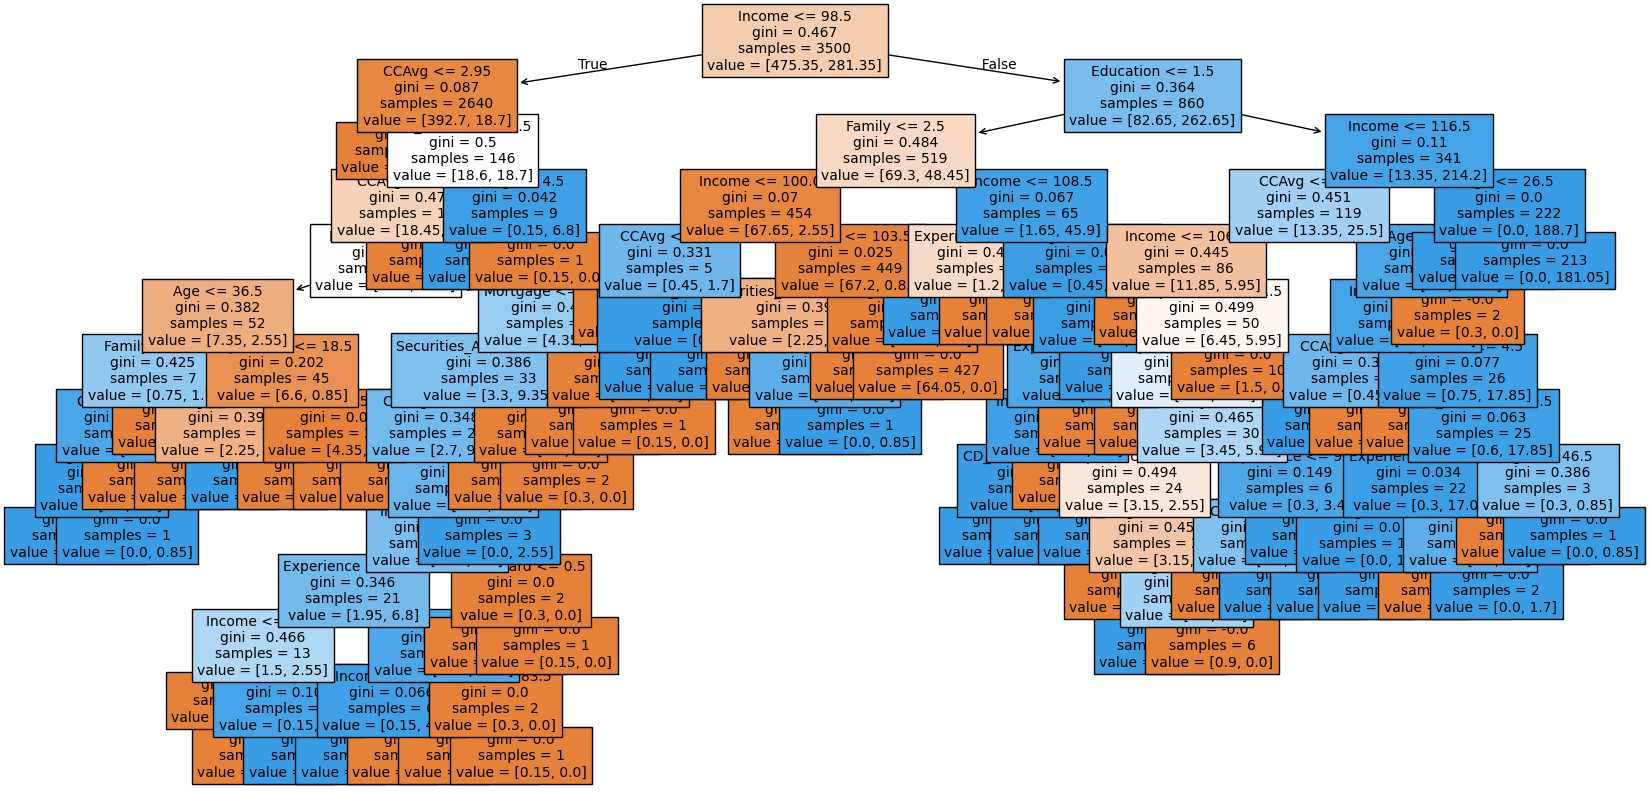

In [ ]:
# Displays the default decision tree
plt.figure(figsize=(20,10))
default = tree.plot_tree(dTree_model, feature_names=feature_names, class_names=None, filled=True, fontsize=10, node_ids=False)

# Displays arrows to show the decison tree split
for d in default:
  arrow = d.arrow_patch
if arrow is not None:
  arrow.set_edgecolor('black')
  arrow.set_linewidth(1.5)
plt.show()

In [ ]:
# Text report to show the rules of the decision tree
print(tree.export_text(dTree_model, feature_names=feature_names))

|--- Income <= 98.50
|   |--- CCAvg <= 2.95
|   |   |--- class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- CCAvg <= 3.95
|   |   |   |   |--- Income <= 81.50
|   |   |   |   |   |--- Experience <= 12.50
|   |   |   |   |   |   |--- Family <= 3.50
|   |   |   |   |   |   |   |--- CCAvg <= 3.50
|   |   |   |   |   |   |   |   |--- Family <= 2.50
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- Family >  2.50
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- CCAvg >  3.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- Family >  3.50
|   |   |   |   |   |   |   |--- Mortgage <= 58.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- Mortgage >  58.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- Experience >  12.50
|   |   |   |   |   |   |--- ZIPCode <= 91269.00
|   |   |   |   |   |   |   |--- ID <= 1184.50

Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 6, Score: 0.00300
Feature: 7, Score: 0.00472
Feature: 8, Score: 0.01136
Feature: 1, Score: 0.01346
Feature: 0, Score: 0.01682
Feature: 4, Score: 0.08497
Feature: 5, Score: 0.12551
Feature: 3, Score: 0.14489
Feature: 2, Score: 0.59528


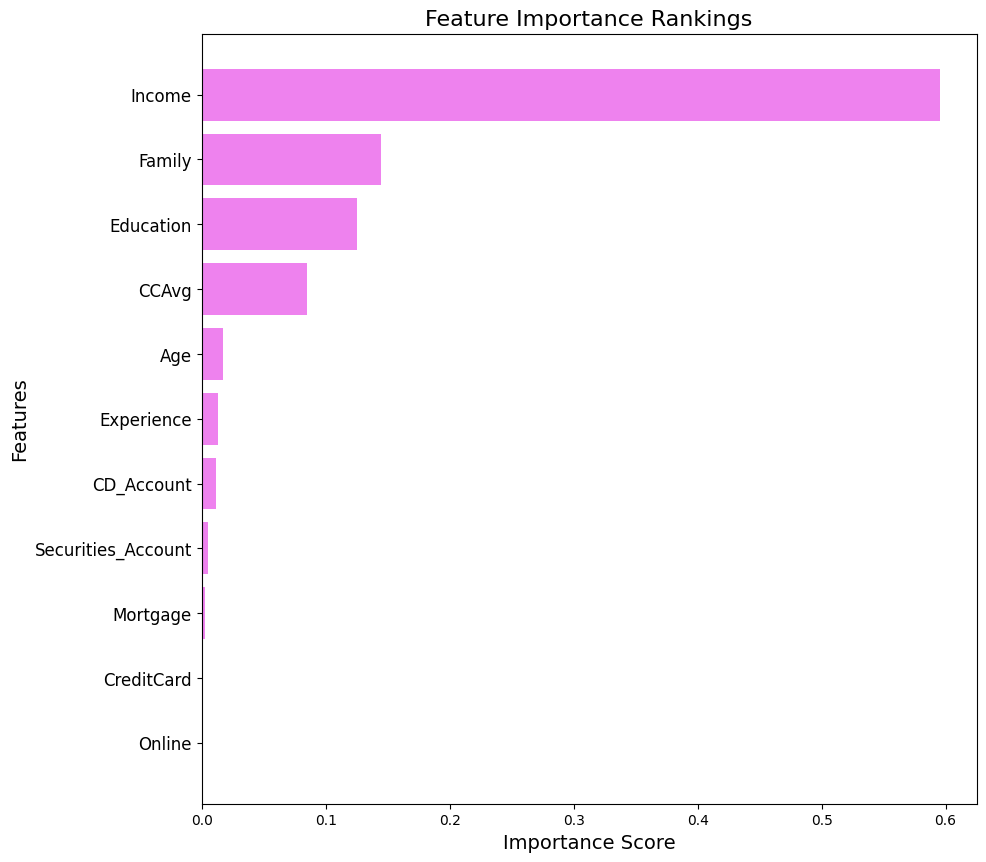

In [ ]:
# Calculate feature importance from the decision tree model
feature_importance = dTree_model.feature_importances_
sorted_indices = np.argsort(feature_importance)

# Print out feature importance scores
for index in sorted_indices:
    print(f'Feature: {index}, Score: {feature_importance[index]:.5f}')

# Visualize feature importance
plt.figure(figsize=(10, 10))
plt.title("Feature Importance Rankings", fontsize=16)
plt.barh(range(len(sorted_indices)), feature_importance[sorted_indices], color="violet")
plt.yticks(range(len(sorted_indices)), [feature_names[i] for i in sorted_indices], fontsize=12)
plt.xlabel("Importance Score", fontsize=14)
plt.ylabel("Features", fontsize=14)
plt.show()

* Based on the feature importance barplot above, Income, Family, Education and CCAvg are the important features to predict potential customers who will accept a loan

## Model Performance Improvement

## **Pre-Pruning**

* Based on the confusion matrix for the training and testing set for the default decision tree, GridSearch will be used for hyperparameter tuning to reduce overfitting

In [ ]:
# Create a decision tree classifier with specific class weights
classifier = DecisionTreeClassifier(random_state=1, class_weight={0: 0.15, 1: 0.85})

# Define a set of parameters for grid search
param_grid = {
    "max_depth": [5, 10, 15, None],
    "criterion": ["entropy", "gini"],
    "splitter": ["best", "random"],
    "min_impurity_decrease": [0.00001, 0.0001, 0.01],
}

# Create a recall scorer
recall_scorer = make_scorer(recall_score)

# Initialize grid search with cross-validation
grid_search_cv = GridSearchCV(classifier, param_grid, scoring=recall_scorer, cv=5)

# Fit the grid search to the training dataset
grid_search_cv.fit(X_train, Y_train)

# Get the optimal classifier based on the grid search results
optimal_classifier = grid_search_cv.best_estimator_

# Train the optimal classifier on the training data
optimal_classifier.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight={0: 0.15, 1: 0.85}, max_depth=5,
                       min_impurity_decrease=1e-05, random_state=1)

**Performance on Training Set**

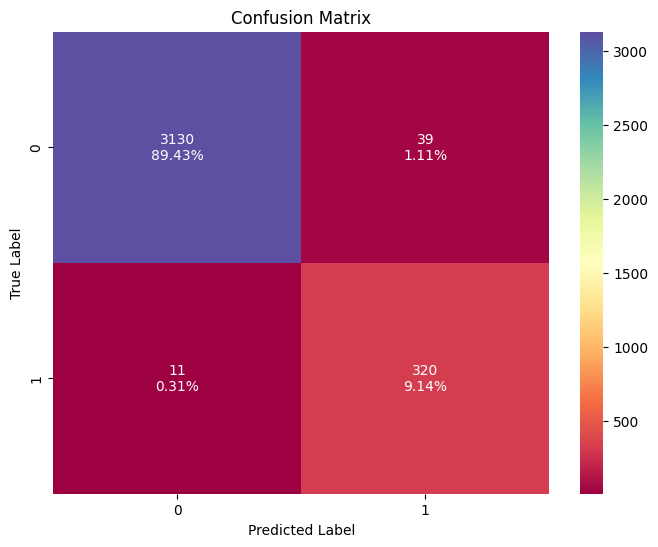

In [ ]:
# As referenced by Personal Loan Campaign project by Vy Nguyen (@vyng0302)
# Shows the confusion matrix of the training set of the pre-pruned decision tree
dTree_model_confusion_matrix(optimal_classifier, X_train, Y_train, optimal_classifier.classes_)

In [ ]:
# As referenced by Personal Loan Campaign project by Vy Nguyen (@vyng0302)
# Shows the model metrics of the training set of the pre-pruned decision tree
dTree_model_pre_pruned_train = dTree_model_metrics(optimal_classifier, X_train, Y_train, average='binary')
dTree_model_pre_pruned_train

Accuracy    Recall  Precision  F1 Score
0  0.985714  0.966767   0.891365  0.927536

* The model has 98.57% accuracy, which is an indication of overfitting.
* The model has a recall score of 96.67%.

**Performance on Testing Set**

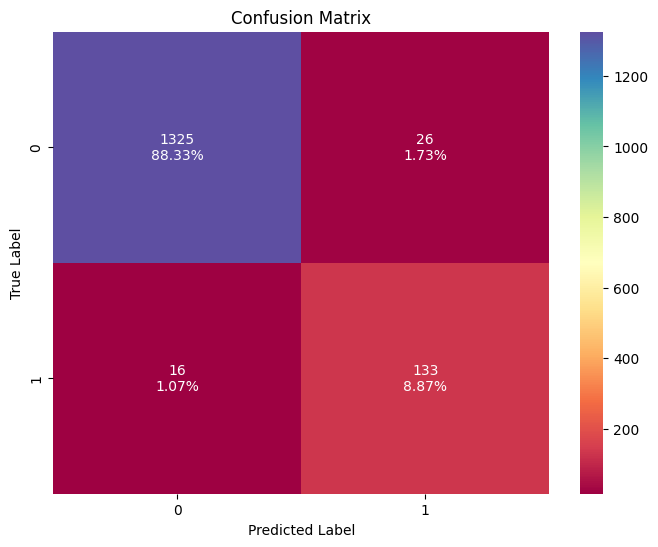

In [ ]:
# As referenced by Personal Loan Campaign project by Vy Nguyen (@vyng0302)
# Shows the confusion matrix of the testing set of the pre-pruned decision tree
dTree_model_confusion_matrix(optimal_classifier, X_test, Y_test, optimal_classifier.classes_)

In [ ]:
# As referenced by Personal Loan Campaign project by Vy Nguyen (@vyng0302)
# Shows the model metrics for test data of the pre-pruned decision tree
dTree_model_pre_pruned_test = dTree_model_metrics(optimal_classifier, X_test, Y_test, average='binary')
dTree_model_pre_pruned_test

Accuracy    Recall  Precision  F1 Score
0     0.972  0.892617   0.836478  0.863636

* The model has better performance on the testing set but lower recall score.

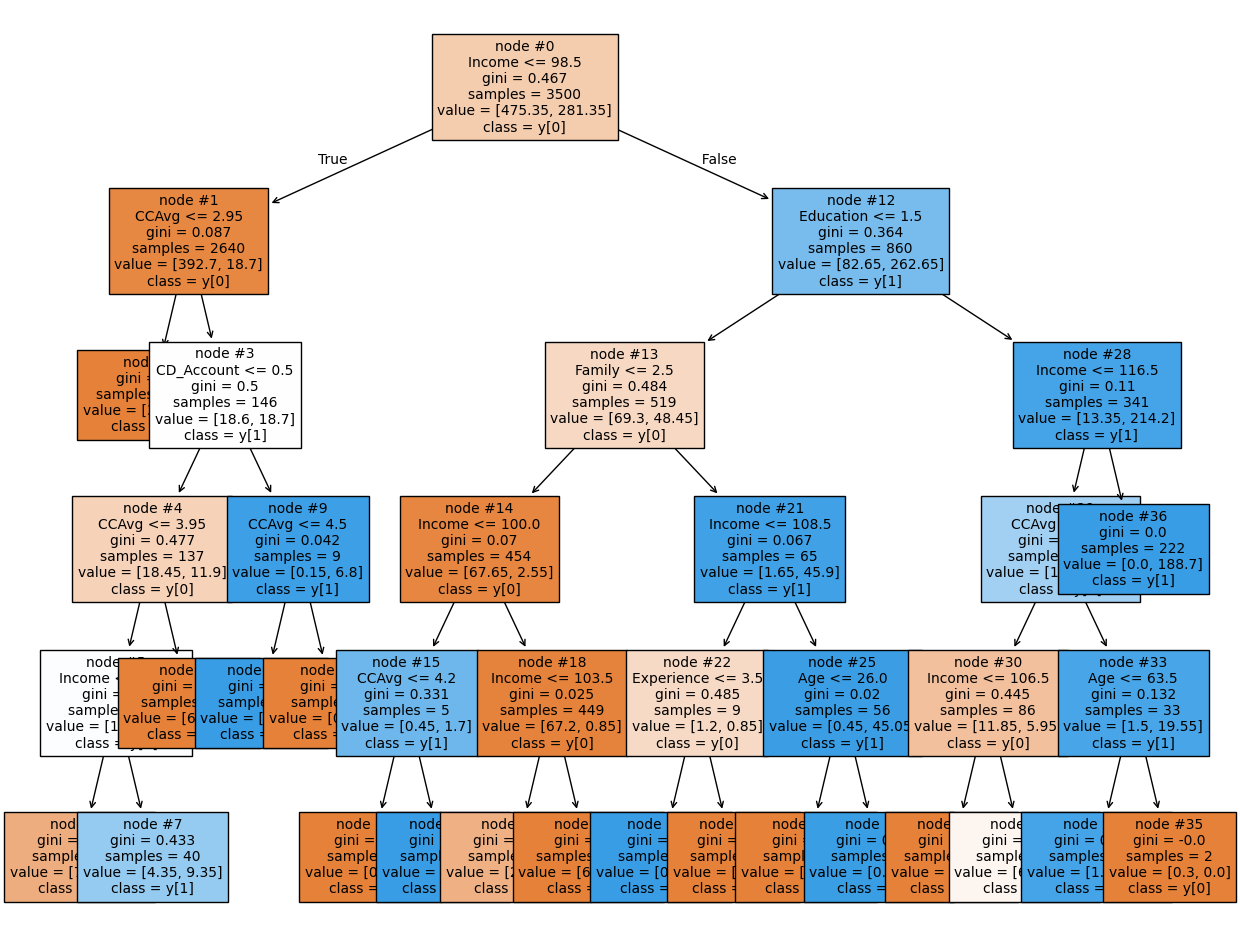

In [ ]:
# As referenced by Personal Loan Campaign project by Vy Nguyen (@vyng0302)
# Displays the pre-pruned decision tree
plt.figure(figsize=(15,12))
default = tree.plot_tree(optimal_classifier, feature_names=feature_names, class_names=True, filled=True, fontsize=10, node_ids=True)
plt.show()

* The decision tree is still hard to interpret and read after hyperparameter tuning.

In [ ]:
# As referenced by Personal Loan Campaign project by Vy Nguyen (@vyng0302)
# Shows the rules of the pre-pruned decision tree
print(tree.export_text(optimal_classifier, feature_names=feature_names))

|--- Income <= 98.50
|   |--- CCAvg <= 2.95
|   |   |--- class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- CCAvg <= 3.95
|   |   |   |   |--- Income <= 81.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Income >  81.50
|   |   |   |   |   |--- class: 1
|   |   |   |--- CCAvg >  3.95
|   |   |   |   |--- class: 0
|   |   |--- CD_Account >  0.50
|   |   |   |--- CCAvg <= 4.50
|   |   |   |   |--- class: 1
|   |   |   |--- CCAvg >  4.50
|   |   |   |   |--- class: 0
|--- Income >  98.50
|   |--- Education <= 1.50
|   |   |--- Family <= 2.50
|   |   |   |--- Income <= 100.00
|   |   |   |   |--- CCAvg <= 4.20
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- CCAvg >  4.20
|   |   |   |   |   |--- class: 1
|   |   |   |--- Income >  100.00
|   |   |   |   |--- Income <= 103.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Income >  103.50
|   |   |   |   |   |--- class: 0
|   |   |--- Family >  2.50
|   |   |   |--- Income <= 108.50
|  

Feature: 0, Score: 0.00246
Feature: 1, Score: 0.00298
Feature: 2, Score: 0.62293
Feature: 3, Score: 0.14672
Feature: 4, Score: 0.08259
Feature: 5, Score: 0.13066
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01166
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000


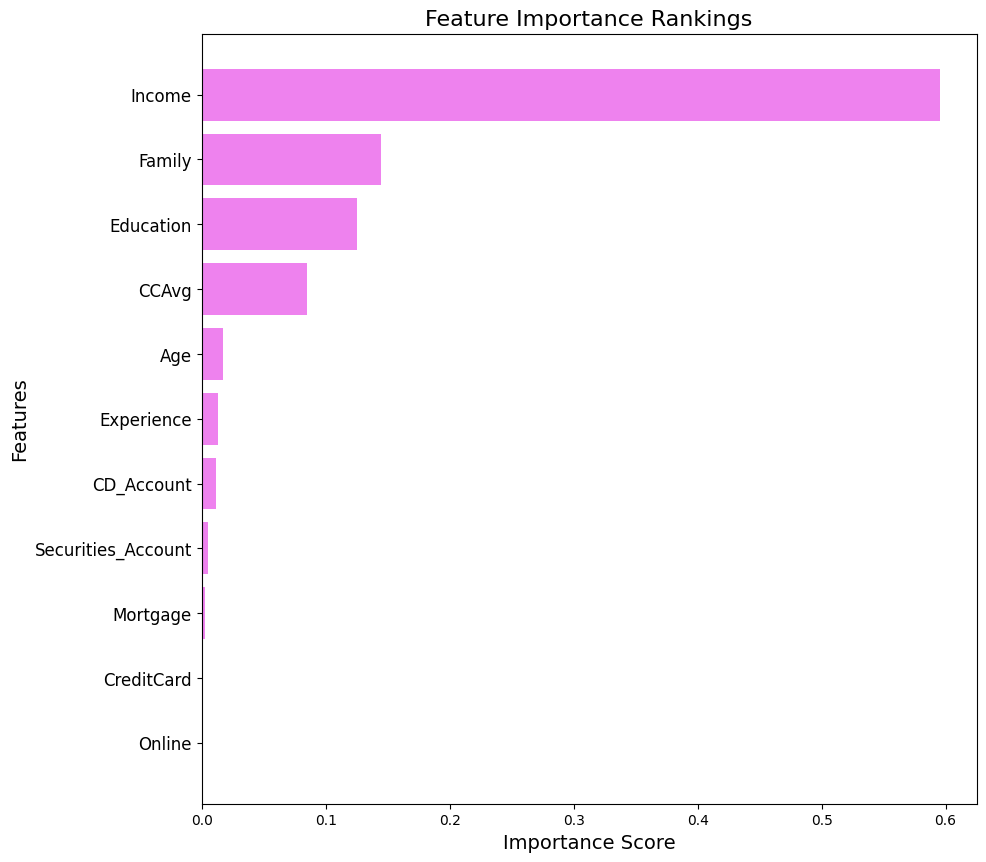

In [ ]:
# As referenced by Personal Loan Campaign project by Vy Nguyen (@vyng0302)
# Shows the feature importance of the pre-pruned decision tree
importance1 = optimal_classifier.feature_importances_
indice1 = np.argsort(importance1)
# summarize feature importance
for i,v in enumerate(importance1):
	print('Feature: %0d, Score: %.5f' % (i,v))

# Visualize feature importance
plt.figure(figsize=(10, 10))
plt.title("Feature Importance Rankings", fontsize=16)
plt.barh(range(len(sorted_indices)), feature_importance[sorted_indices], color="violet")
plt.yticks(range(len(sorted_indices)), [feature_names[i] for i in sorted_indices], fontsize=12)
plt.xlabel("Importance Score", fontsize=14)
plt.ylabel("Features", fontsize=14)
plt.show()

* After pre-pruning, Income and Family are the most important features for predicting which potential customers will accept a loan

**Post-Pruning**

In [ ]:
# Initialize the Decision Tree Classifier with specific parameters
tree_classifier = DecisionTreeClassifier(random_state=1, class_weight={0: 0.15, 1: 0.85})

# Compute the cost complexity pruning path for the training data
pruning_path = tree_classifier.cost_complexity_pruning_path(X_train, Y_train)

# Extract the alpha values and impurities from the pruning path
alphas, impurity_values = pruning_path.ccp_alphas, pruning_path.impurities

In [ ]:
# As referenced by Personal Loan Campaign project by Vy Nguyen (@vyng0302)
pd.DataFrame(pruning_path)

ccp_alphas    impurities
0   0.000000e+00 -3.222838e-15
1   7.482671e-19 -3.222090e-15
2   7.482671e-19 -3.221341e-15
3   1.496534e-18 -3.219845e-15
4   1.760629e-18 -3.218084e-15
5   2.332833e-18 -3.215751e-15
6   4.665666e-18 -3.211086e-15
7   5.854090e-18 -3.205232e-15
8   7.658734e-18 -3.197573e-15
9   8.979206e-18 -3.188594e-15
10  1.143528e-16 -3.074241e-15
11  1.218179e-15 -1.856062e-15
12  2.625571e-04  7.876713e-04
13  3.369896e-04  1.124661e-03
14  3.643130e-04  1.488974e-03
15  3.643130e-04  2.217600e-03
16  3.744328e-04  2.592033e-03
17  3.804721e-04  4.494393e-03
18  3.829427e-04  4.877336e-03
19  3.879017e-04  5.265238e-03
20  3.899406e-04  5.655178e-03
21  5.429422e-04  6.741062e-03
22  6.925559e-04  7.433618e-03
23  6.938264e-04  8.127445e-03
24  8.174649e-04  1.221477e-02
25  9.095010e-04  1.312427e-02
26  9.404360e-04  1.406471e-02
27  9.407728e-04  1.594625e-02
28  9.951370e-04  1.793653e-02
29  1.011155e-03  1.894768e-02
30  1.241540e-03  2.267230e-02
31  1.242301e-03  2.639920e-02
32  1.315081e-03  2.771429e-02
33  1.399934e-03  2.911422e-02
34  1.638043e-03  3.075226e-02
35  1.717019e-03  3.246928e-02
36  2.289245e-03  3.475853e-02
37  2.742431e-03  3.750096e-02
38  3.335999e-03  4.083696e-02
39  3.527226e-03  4.436418e-02
40  5.138280e-03  4.950246e-02
41  9.008434e-03  5.851090e-02
42  1.005479e-02  6.856568e-02
43  2.253222e-02  9.109791e-02
44  6.112098e-02  2.133399e-01
45  2.537957e-01  4.671356e-01

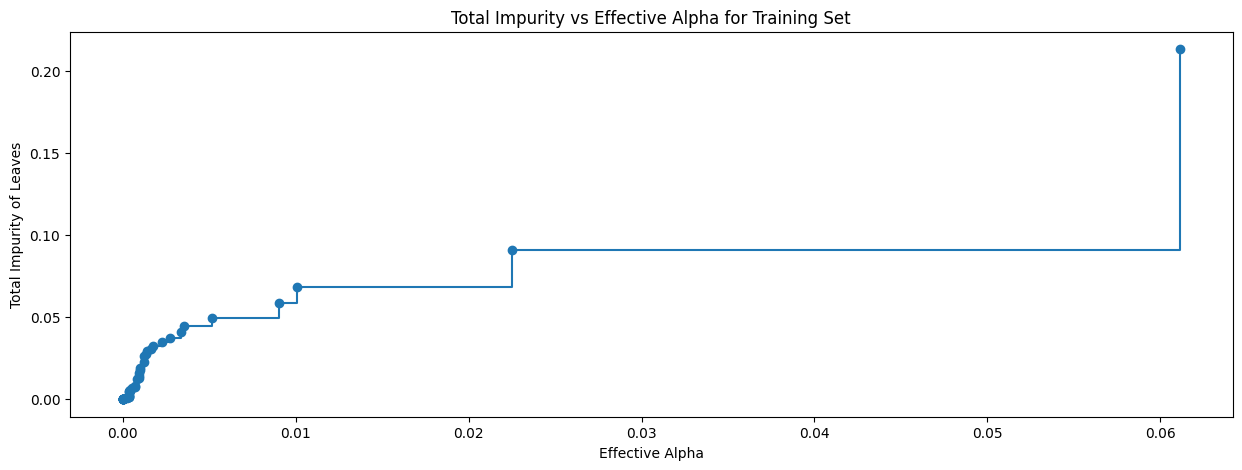

In [ ]:
# As referenced by Personal Loan Campaign project by Vy Nguyen (@vyng0302)
fg, x = plt.subplots(figsize=(15, 5))
x.plot(alphas[:-1], impurity_values[:-1], marker="o", drawstyle="steps-post")
x.set_xlabel("Effective Alpha")
x.set_ylabel("Total Impurity of Leaves")
x.set_title("Total Impurity vs Effective Alpha for Training Set")
plt.show()

ccp_alpha: 0.00000, Number of nodes: 91
ccp_alpha: 0.00263, Number of nodes: 13
ccp_alpha: 0.00526, Number of nodes: 9
ccp_alpha: 0.00789, Number of nodes: 7
ccp_alpha: 0.01053, Number of nodes: 7
ccp_alpha: 0.01316, Number of nodes: 7
ccp_alpha: 0.01579, Number of nodes: 7
ccp_alpha: 0.01842, Number of nodes: 7
ccp_alpha: 0.02105, Number of nodes: 7
ccp_alpha: 0.02368, Number of nodes: 7
ccp_alpha: 0.02632, Number of nodes: 5
ccp_alpha: 0.02895, Number of nodes: 5
ccp_alpha: 0.03158, Number of nodes: 5
ccp_alpha: 0.03421, Number of nodes: 5
ccp_alpha: 0.03684, Number of nodes: 5
ccp_alpha: 0.03947, Number of nodes: 5
ccp_alpha: 0.04211, Number of nodes: 5
ccp_alpha: 0.04474, Number of nodes: 5
ccp_alpha: 0.04737, Number of nodes: 5
ccp_alpha: 0.05000, Number of nodes: 5


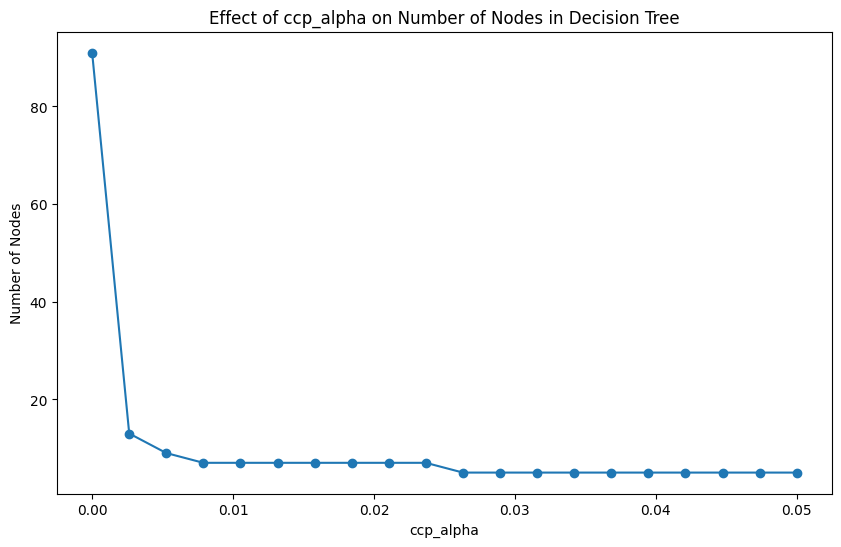

In [ ]:
# As referenced by Personal Loan Campaign project by Vy Nguyen (@vyng0302)
# Define a range of ccp_alpha values
ccp_alphas = np.linspace(0, 0.05, 20)

# Store the number of nodes for each classifier
node_counts = []

# Fit Decision Trees with different ccp_alpha values
for alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=alpha)
    clf.fit(X_train, Y_train)
    node_counts.append(clf.tree_.node_count)

# Display the number of nodes for each ccp_alpha value
for alpha, count in zip(ccp_alphas, node_counts):
    print(f"ccp_alpha: {alpha:.5f}, Number of nodes: {count}")

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, node_counts, marker='o', linestyle='-')
plt.title("Effect of ccp_alpha on Number of Nodes in Decision Tree")
plt.xlabel("ccp_alpha")
plt.ylabel("Number of Nodes")
plt.show()

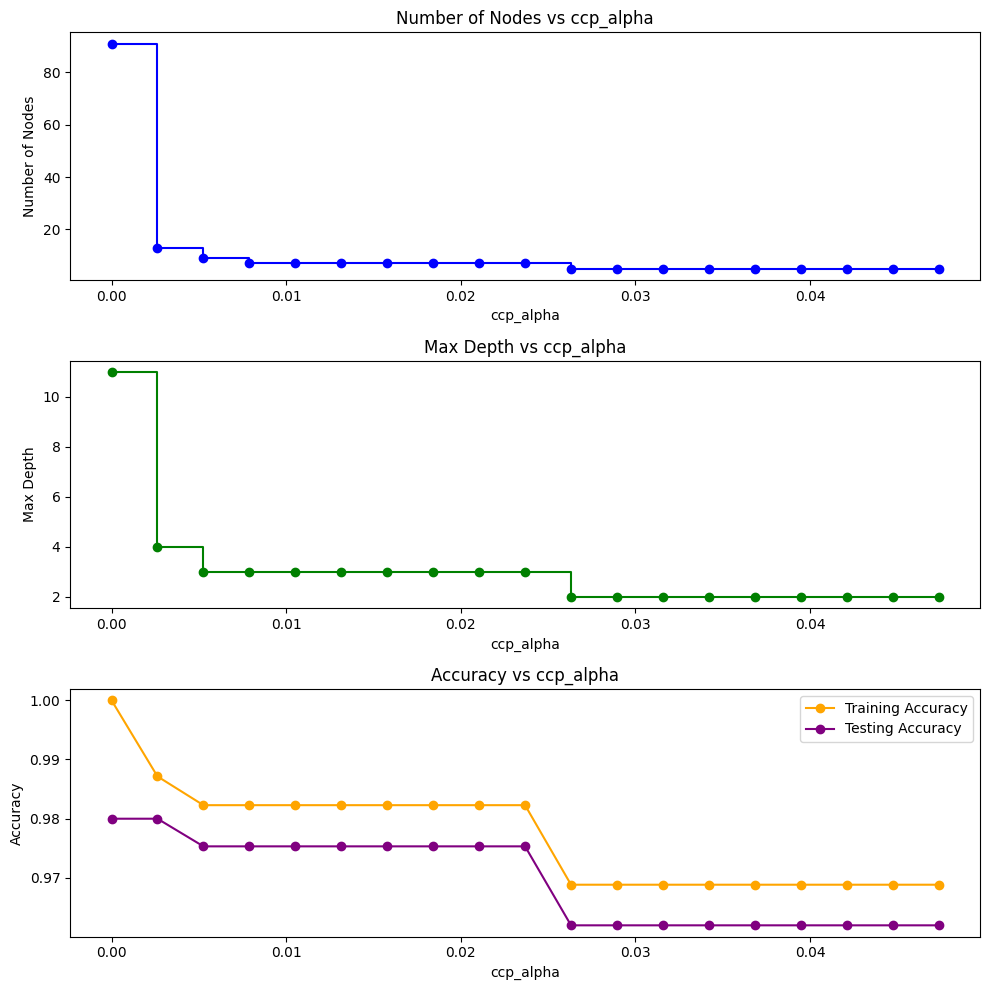

In [ ]:
# As referenced by Personal Loan Campaign project by Vy Nguyen (@vyng0302)
# Define a range of ccp_alpha values for pruning
ccp_alphas = ccp_alphas[:-1]
results = []

# Train decision trees with different ccp_alpha values and gather metrics
for alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=alpha)
    clf.fit(X_train, Y_train)

    # Collect metrics
    metrics = {
        'alpha': alpha,
        'node_count': clf.tree_.node_count,
        'max_depth': clf.tree_.max_depth,
        'train_accuracy': accuracy_score(Y_train, clf.predict(X_train)),
        'test_accuracy': accuracy_score(Y_test, clf.predict(X_test)),
    }
    results.append(metrics)

# Extract metrics for plotting
alphas = [result['alpha'] for result in results]
node_counts = [result['node_count'] for result in results]
depths = [result['max_depth'] for result in results]
train_accuracies = [result['train_accuracy'] for result in results]
test_accuracies = [result['test_accuracy'] for result in results]

# Create subplots for visualizing metrics
fig, axs = plt.subplots(3, 1, figsize=(10, 10))

# Plot number of nodes vs ccp_alpha
axs[0].plot(alphas, node_counts, marker='o', color='b', drawstyle='steps-post')
axs[0].set_xlabel("ccp_alpha")
axs[0].set_ylabel("Number of Nodes")
axs[0].set_title("Number of Nodes vs ccp_alpha")


# Plot max depth vs ccp_alpha
axs[1].plot(alphas, depths, marker='o', color='g', drawstyle='steps-post')
axs[1].set_xlabel("ccp_alpha")
axs[1].set_ylabel("Max Depth")
axs[1].set_title("Max Depth vs ccp_alpha")


# Plot training and testing accuracy vs ccp_alpha
axs[2].plot(alphas, train_accuracies, marker='o', label='Training Accuracy', color='orange')
axs[2].plot(alphas, test_accuracies, marker='o', label='Testing Accuracy', color='purple')
axs[2].set_xlabel("ccp_alpha")
axs[2].set_ylabel("Accuracy")
axs[2].set_title("Accuracy vs ccp_alpha")
axs[2].legend()


# Adjust layout for better spacing
fig.tight_layout()
plt.show()

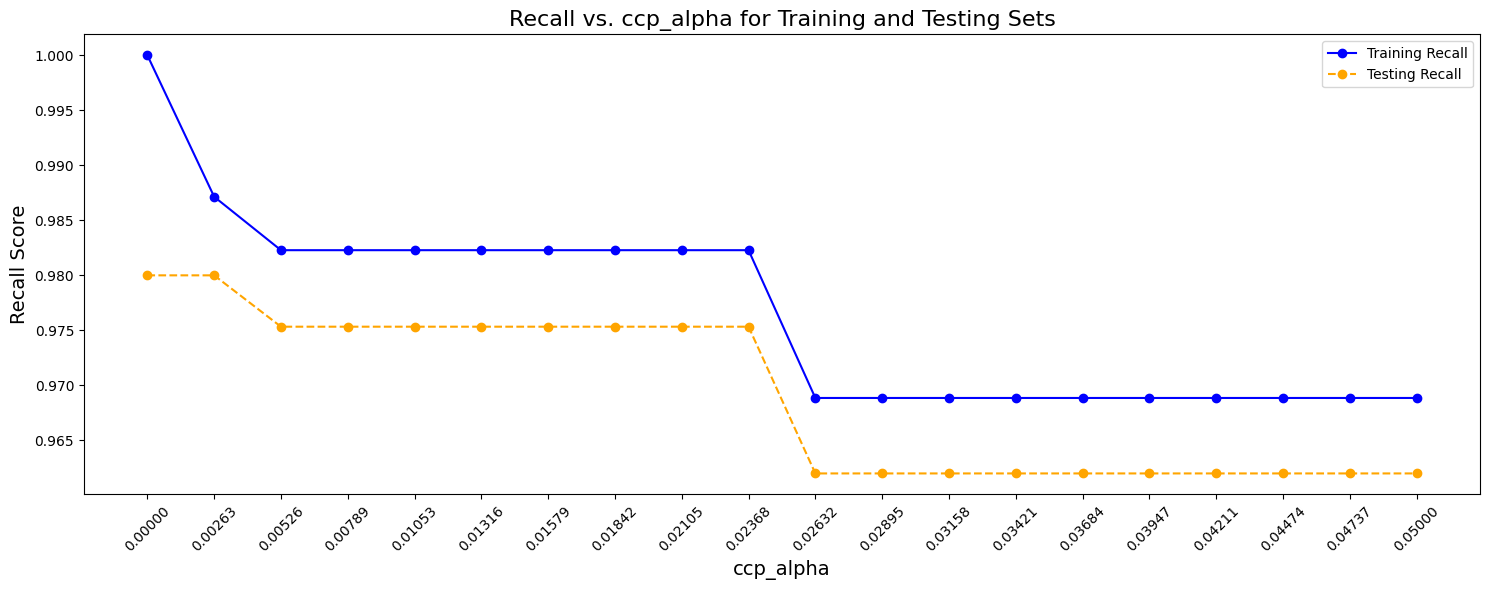

In [ ]:
# As referenced by Personal Loan Campaign project by Vy Nguyen (@vyng0302)
# Define a range of ccp_alpha values for pruning
ccp_alphas = np.linspace(0, 0.05, 20)
recall_results = []

# Function to calculate recall for different ccp_alpha values
def calculate_recall(ccp_alphas, X_train, Y_train, X_test, Y_test):
    recall_train = []
    recall_test = []

    for alpha in ccp_alphas:
        clf = DecisionTreeClassifier(random_state=1, ccp_alpha=alpha)
        clf.fit(X_train, Y_train)

        # Calculate recall for training and testing sets
        train_pred = clf.predict(X_train)
        test_pred = clf.predict(X_test)

        recall_train.append(recall_score(Y_train, train_pred, average='weighted'))
        recall_test.append(recall_score(Y_test, test_pred, average='weighted'))

    return recall_train, recall_test

# Calculate recall scores
recall_train, recall_test = calculate_recall(ccp_alphas, X_train, Y_train, X_test, Y_test)

# Plotting the recall results
plt.figure(figsize=(15, 6))
plt.plot(ccp_alphas, recall_train, marker='o', linestyle='-', label='Training Recall', color='blue')
plt.plot(ccp_alphas, recall_test, marker='o', linestyle='--', label='Testing Recall', color='orange')
plt.title('Recall vs. ccp_alpha for Training and Testing Sets', fontsize=16)
plt.xlabel('ccp_alpha', fontsize=14)
plt.ylabel('Recall Score', fontsize=14)
plt.xticks(ccp_alphas, rotation=45)
plt.legend()
plt.tight_layout()

plt.show()

In [ ]:
# Initialize lists to store metrics
recall_train = []
recall_test = []
models = []  # Store models here

# Train decision trees with different ccp_alpha values
for alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=alpha)
    clf.fit(X_train, Y_train)

    # Store the fitted model
    models.append(clf)

    # Calculate recall for training and testing sets
    train_pred = clf.predict(X_train)
    test_pred = clf.predict(X_test)

    recall_train.append(recall_score(Y_train, train_pred, average='weighted'))
    recall_test.append(recall_score(Y_test, test_pred, average='weighted'))

# Filter out the models where ccp_alpha is 0
non_zero_indices = np.where(ccp_alphas > 0)[0]

# Get recall scores for non-zero ccp_alpha models
non_zero_recall_train = [recall_train[i] for i in non_zero_indices]
non_zero_recall_test = [recall_test[i] for i in non_zero_indices]
non_zero_models = [models[i] for i in non_zero_indices]

# Find the index of the best model based on testing recall among non-zero ccp_alpha models
best_model_index = np.argmax(non_zero_recall_test)

# Get the best model (this will be a fitted model, not a tuple)
best_model = non_zero_models[best_model_index]

# Output details of the best model
best_ccp_alpha = ccp_alphas[non_zero_indices[best_model_index]]
print(f"Best model (ccp_alpha: {best_ccp_alpha:.5f}):")
print(best_model)

Best model (ccp_alpha: 0.00263):
DecisionTreeClassifier(ccp_alpha=0.002631578947368421, random_state=1)


**Performance on Training Set**

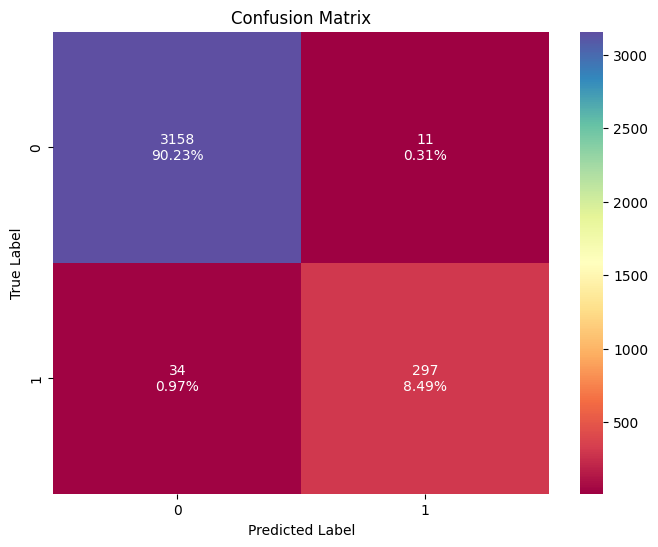

In [ ]:
# As referenced by Personal Loan Campaign project by Vy Nguyen (@vyng0302)
# Shows the confusion matrix of the training set on the post-pruned decision tree
m3 = best_model
dTree_model_confusion_matrix(m3, X_train, Y_train, labels=np.unique(Y_train))

In [ ]:
# As referenced by Personal Loan Campaign project by Vy Nguyen (@vyng0302)
# Shows the model metrics of the training set of the post-pruned decision tree
dTree_model_post_pruning_train = dTree_model_metrics(m3, X_train, Y_train, average='binary')
dTree_model_post_pruning_train

Accuracy    Recall  Precision  F1 Score
0  0.987143  0.897281   0.964286  0.929577

* The post-pruned model has a higher recall than the test model for the pre-pruned model
* The F1 score has improved for the testing set
* The model has high precision

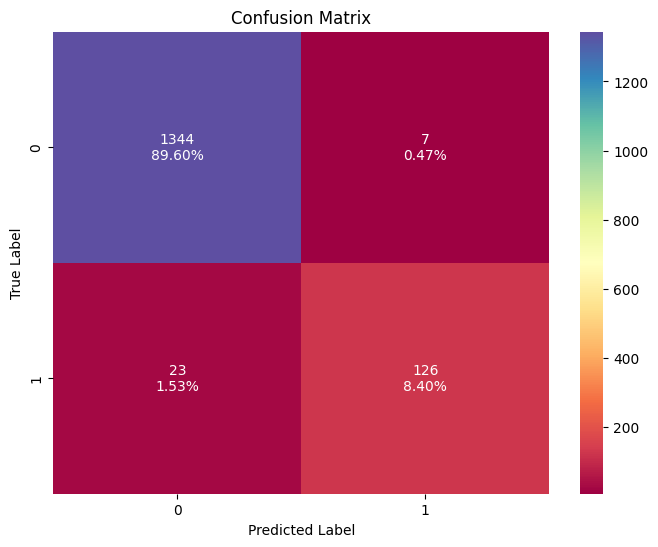

In [ ]:
# As referenced by Personal Loan Campaign project by Vy Nguyen (@vyng0302)
# Shows the confusion matrix of the testing set of the post-pruned decision tree
dTree_model_confusion_matrix(m3, X_test, Y_test, labels=m3.classes_)

In [ ]:
# As referenced by Personal Loan Campaign project by Vy Nguyen (@vyng0302)
# Shows the model metrics of the testing set of the post-pruned decision tree
dTree_model_post_pruning_test = dTree_model_metrics(m3, X_test, Y_test, average='binary')
dTree_model_post_pruning_test

Accuracy    Recall  Precision  F1 Score
0      0.98  0.845638   0.947368  0.893617

* The model performance has improved after cost complexity pruning.
* The model has a high accuracy (98%)

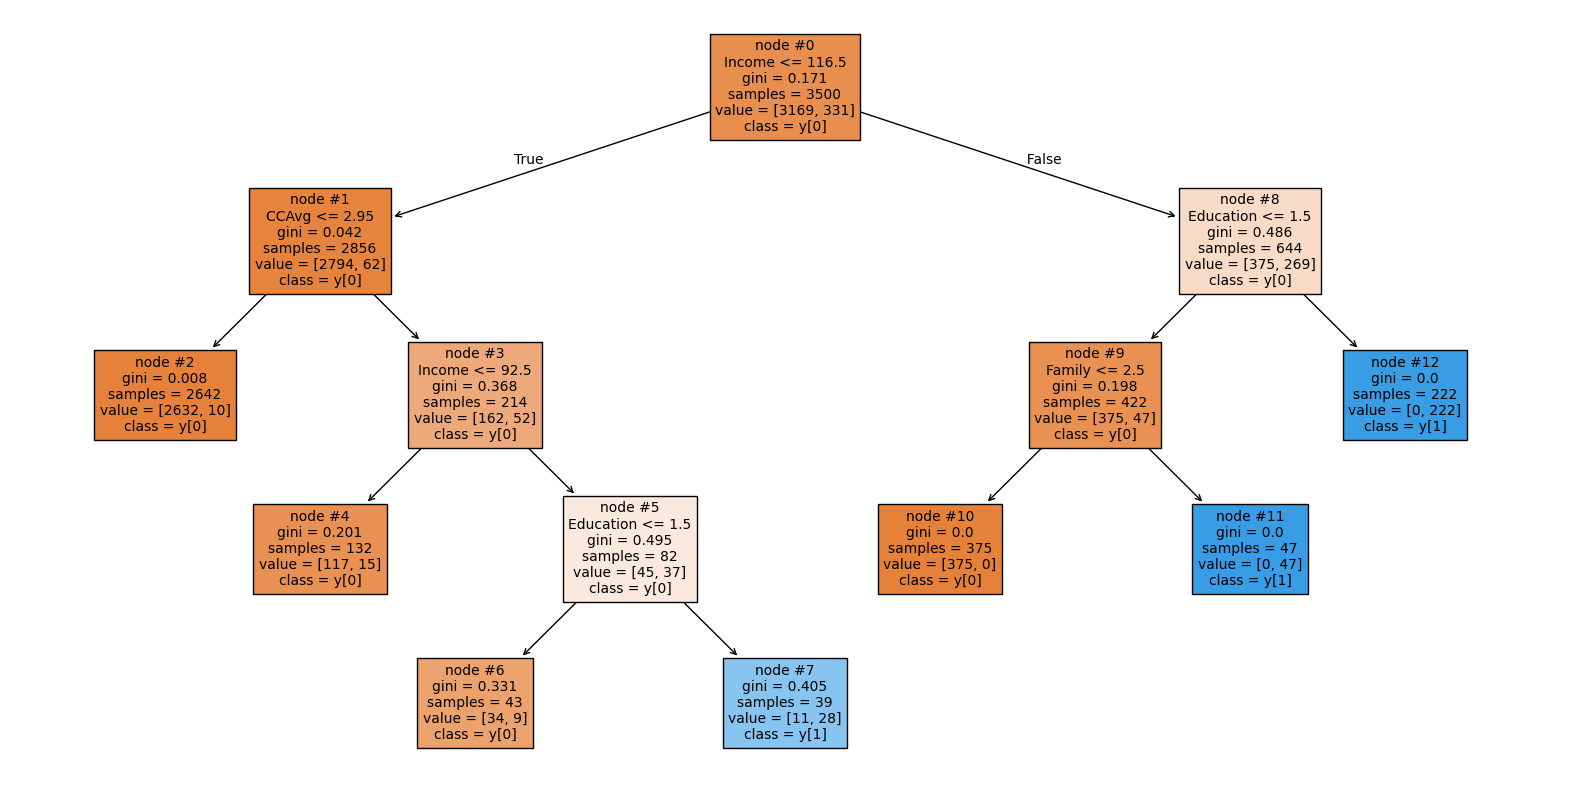

In [ ]:
# As referenced by Personal Loan Campaign project by Vy Nguyen (@vyng0302)
# Shows the post-pruned decision tree
plt.figure(figsize=(20,10))
default = tree.plot_tree(m3, feature_names=feature_names, class_names=True, filled=True, fontsize=10, node_ids=True)
plt.show()

* The decision tree model has been simplified and is easy to interpret.
* This decision tree model also has the fewest leaf nodes.

In [ ]:
# As referenced by Personal Loan Campaign project by Vy Nguyen (@vyng0302)
# Text report that shows the rules of the post-pruned decision tree
print(tree.export_text(m3, feature_names=feature_names))

|--- Income <= 116.50
|   |--- CCAvg <= 2.95
|   |   |--- class: 0
|   |--- CCAvg >  2.95
|   |   |--- Income <= 92.50
|   |   |   |--- class: 0
|   |   |--- Income >  92.50
|   |   |   |--- Education <= 1.50
|   |   |   |   |--- class: 0
|   |   |   |--- Education >  1.50
|   |   |   |   |--- class: 1
|--- Income >  116.50
|   |--- Education <= 1.50
|   |   |--- Family <= 2.50
|   |   |   |--- class: 0
|   |   |--- Family >  2.50
|   |   |   |--- class: 1
|   |--- Education >  1.50
|   |   |--- class: 1



Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.33726
Feature: 3, Score: 0.15976
Feature: 4, Score: 0.04333
Feature: 5, Score: 0.45965
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000


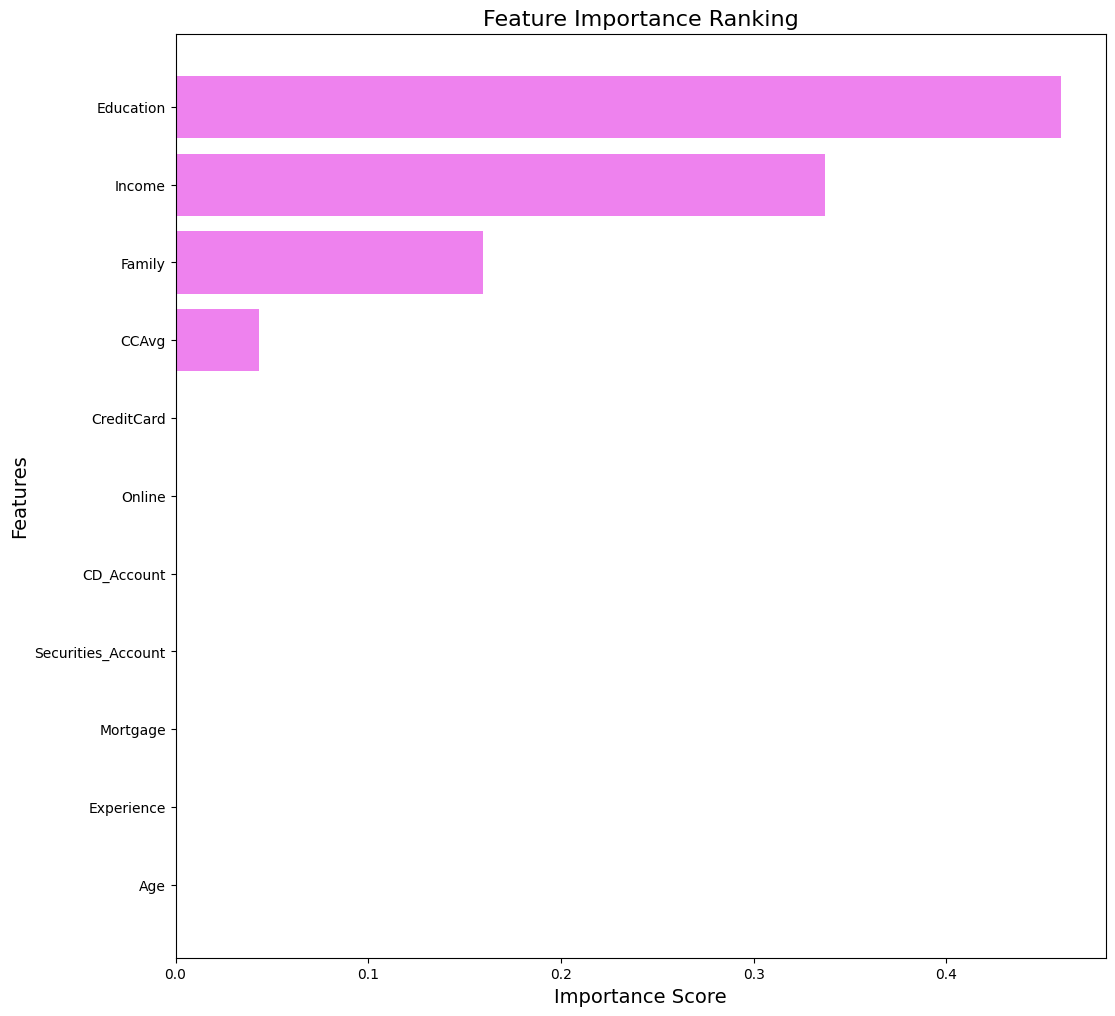

In [ ]:
# As referenced by Personal Loan Campaign project by Vy Nguyen (@vyng0302)
importance2 = m3.feature_importances_
indice2 = np.argsort(importance2)
# summarize feature importance
for i,v in enumerate(importance2):
	print('Feature: %0d, Score: %.5f' % (i,v))

# Visualize the feature importance ranking
plt.figure(figsize=(12, 12))
plt.title("Feature Importance Ranking", fontsize=16)
plt.barh(range(len(indice2)), importance2[indice2], color="violet", align="center")
plt.yticks(range(len(indice2)), [feature_names[i] for i in indice2])
plt.xlabel("Importance Score", fontsize=14)
plt.ylabel("Features", fontsize=14)
plt.show()

* After applying cost complexity pruning, it has found that Education and Income are the most features when determining which potential customers will accept a loan

## Model Performance Comparison and Final Model Selection

In [ ]:
# As referenced by Personal Loan Campaign project by Vy Nguyen (@vyng0302)
# Comparison of Training Performance
model_train = pd.concat([dTree_model_default_train.T, dTree_model_pre_pruned_train.T, dTree_model_post_pruning_train.T], axis=1)
model_train.columns = [' Decision Tree (Default)', 'Decision Tree (Pre-Pruned)', 'Decision Tree (Post-Pruned)']
model_train
print("Comparison of Training Performance")
model_train

Comparison of Training Performance


Decision Tree (Default)  Decision Tree (Pre-Pruned)  \
Accuracy                        1.0                    0.985714   
Recall                          1.0                    0.966767   
Precision                       1.0                    0.891365   
F1 Score                        1.0                    0.927536   

           Decision Tree (Post-Pruned)  
Accuracy                      0.987143  
Recall                        0.897281  
Precision                     0.964286  
F1 Score                      0.929577

In [ ]:
# As referenced by Personal Loan Campaign project by Vy Nguyen (@vyng0302)
# Comparison of Testing Performance
model_test = pd.concat([dTree_model_default_test.T, dTree_model_pre_pruned_test.T, dTree_model_post_pruning_test.T], axis=1)
model_test.columns = [' Decision Tree (Default)', 'Decision Tree (Pre-Pruned)', 'Decision Tree (Post-Pruned)']
model_test
print("Comparison of Testing Performance")
model_test

Comparison of Testing Performance


Decision Tree (Default)  Decision Tree (Pre-Pruned)  \
Accuracy                   0.976000                    0.972000   
Recall                     0.859060                    0.892617   
Precision                  0.895105                    0.836478   
F1 Score                   0.876712                    0.863636   

           Decision Tree (Post-Pruned)  
Accuracy                      0.980000  
Recall                        0.845638  
Precision                     0.947368  
F1 Score                      0.893617

* The Post-Pruned Decision Tree model gives the best results for predicting potential customers due to its high F1 score although the recall score for the Pre-Pruned Decision Tree model is higher.

## Actionable Insights and Business Recommendations


* What recommedations would you suggest to the bank?

 * The primary goal of the business team should be not to miss an opportunity. This is achieved by minimizing false negatives of our prediction.

 * The most important features according to decision tree model were Income, Education, CD account and Family Spending to predict if a customer will buy a personal load.

 * We used decision trees with pre-pruning and post-pruning. The Post Pruning Decision Tree model gave 84.5% recall with 98% accuracy. Decision Trees are easy to train and understand. Hence, it appears, this is the model we are going to use.

 * The level of education, family size, spending on credit card will predict the requirement of the clients for a personal loan. If the average spending on credit card more than three (3) thousand dollars, income is less than ninety-two (92) thousand dollars and have Certificate of Deposit (CD) account, the customers will likely buy the personal loan.

___